# Required Python modules

First, the notebook must be set up with all the necessary tools available from the Jupyter Notebook Ecosystem.

| Module name | Description |
| :---: | :---|
| **os** | [operating system interfaces](https://docs.python.org/3.7/library/os.html) (manage paths, create directories...) |
| **numpy** | [NumPy](https://numpy.org/) allows carrying out scientific computing with Python and managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) handles netCDF files in an intuitive and interactive way. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python numerical plotting library |
| **basemap** |[The basemap toolkit](https://matplotlib.org/basemap/) is a library for plotting 2D data on maps. |

In [5]:
!sudo apt-get install libgeos-3.5.0
!sudo apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     - 133.1 MB 55.4 MB/s
     |████████████████████████████████| 6.3 MB 5.4 MB/s 
     |████████████████████████████████| 219 kB 56.1 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759606 sha256=287e691d73876486f579fcb04de28f9e2aca769e5516e79c4f820460394531ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-d_ffs03g/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-an

In [11]:
#### Import libraries ####
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings('ignore')

### Install the needed Python modules

If you wish to replay this notebook later on your own infrastructure, you may need to check your python version and install the python librairies used in this Notebook.


**Requirement: Python version 3.7**

Check your Python version:

In [1]:
!python --version

Python 3.7.12


If needed you can install the right Python version in this way:
```
conda install python=3.7
```

If you are using the standard *Anaconda3* installation, you can install the needed modules executing the following command in a new cell:
```
conda install numpy xarray matplotlib basemap netcdf4 basemap-data-hires
```

Then, as requested, please restart the kernel.

The kernel maintains the state of a notebook's computations. You can reset this state by restarting the kernel. This is done by clicking on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> in the toolbar above.

## Mounting Google Drive

In our case data was stored on Google Drive. In order to work with data stored on Google Drive we need to mount it first.


In [22]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


To start we will define:
- `FName`: the path of the NetCDF file 

These variable can of course be changed later on depending on the netCDF filename and where the data is stored. 

In [57]:
### Define your data path

# path to folder with your data
path = '/drive/MyDrive/hackathon/'

# Greenland - Iceland data
# FName = path + 'greenland_iceland.nc'

# Sweeden data
FName = path + '/Amin/sweden_jan.nc'

output_folder = 'out_sweeden_h'

if not os.path.isdir('/drive/MyDrive/hackathon/' + output_folder):
  os.mkdir('/drive/MyDrive/hackathon/' + output_folder)

The following cell opens the netCDF file (`xr.open_dataset()` function) and allows you to interactively browse the content of the file. 

In [49]:
### Open and browse the file
xr.open_dataset(FName)

<xarray.Dataset>
Dimensions:        (time: 360, x: 371, y: 231)
Coordinates:
  * x              (x) float64 1.167e+06 1.17e+06 ... 2.274e+06 2.277e+06
  * y              (y) float64 -1.159e+06 -1.156e+06 ... -4.72e+05 -4.69e+05
  * time           (time) datetime64[ns] 2021-01-01T00:30:00 ... 2021-01-15T2...
Data variables:
    stereographic  int8 ...
    siconc         (time, y, x) float64 ...
    latitude       (y, x) float64 ...
    sithick        (time, y, x) float64 ...
    vysi           (time, y, x) float64 ...
    longitude      (y, x) float64 ...
    vxsi           (time, y, x) float64 ...
Attributes: (12/14)
    Conventions:                     CF-1.6
    institution:                     NERSC, Thormoehlens gate 47, N-5006 Berg...
    source:                          neXtSIM model fields
    email:                           nextsimf@nersc.no
    title:                           neXtSIM-F sea ice forecast, 3 km hourly ...
    FROM_ORIGINAL_FILE__field_type:  Files based on file type moorings
    ...                              ...
    field_date:                      2021-11-12
    bulletin_date:                   2021-11-06
    history:                         cmems_postproc.py /Data/nextsimf/forecas...
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    references:                       
    comment:

You can access the **attributes** of a variable by clicking on the **Show/Hide Attribute button** and you can access the **data representation** of a variable by clicking on the **Show/Hide data repr button**. Both buttons are located in the most right column of the product browser.

Now, to store the file content into an xarray Dataset `FIn` and print the content of the dataset, you need to execute the following cell:

In [50]:
#### Open the netCDF file with xr.open_dataset() and get general information ####

## File
FIn = xr.open_dataset(FName);   #Handling of the netCDf file

# Show Header: global attributes
FIn.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:        (time: 360, x: 371, y: 231)
Coordinates:
  * x              (x) float64 1.167e+06 1.17e+06 ... 2.274e+06 2.277e+06
  * y              (y) float64 -1.159e+06 -1.156e+06 ... -4.72e+05 -4.69e+05
  * time           (time) datetime64[ns] 2021-01-01T00:30:00 ... 2021-01-15T2...
Data variables:
    stereographic  int8 ...
    siconc         (time, y, x) float64 ...
    latitude       (y, x) float64 ...
    sithick        (time, y, x) float64 ...
    vysi           (time, y, x) float64 ...
    longitude      (y, x) float64 ...
    vxsi           (time, y, x) float64 ...
Attributes: (12/14)
    Conventions:                     CF-1.6
    institution:                     NERSC, Thormoehlens gate 47, N-5006 Berg...
    source:                          neXtSIM model fields
    email:                           nextsimf@nersc.no
    title:                           neXtSIM-F sea ice forecast, 3 km hourly ...
    FROM_ORIGINAL_FILE__fi

A NetCDF file contains:
- The **dimensions** of the data (here time, depth, latitude and longitude);
- Several **variables** depending on one or more of these dimensions;
- General information about the product (**global attributes**).

In [51]:
###  Print the different variables of a netCDF file ###
FIn.data_vars

Data variables:
    stereographic  int8 ...
    siconc         (time, y, x) float64 ...
    latitude       (y, x) float64 ...
    sithick        (time, y, x) float64 ...
    vysi           (time, y, x) float64 ...
    longitude      (y, x) float64 ...
    vxsi           (time, y, x) float64 ...

In [52]:
### Store only the values in a variable ###
VarTime=FIn.time.values

In [53]:
###  Print the content of the array variable ###
print(VarTime)

['2021-01-01T00:30:00.000000000' '2021-01-01T01:30:00.000000000'
 '2021-01-01T02:30:00.000000000' '2021-01-01T03:30:00.000000000'
 '2021-01-01T04:30:00.000000000' '2021-01-01T05:30:00.000000000'
 '2021-01-01T06:30:00.000000000' '2021-01-01T07:30:00.000000000'
 '2021-01-01T08:30:00.000000000' '2021-01-01T09:30:00.000000000'
 '2021-01-01T10:30:00.000000000' '2021-01-01T11:30:00.000000000'
 '2021-01-01T12:30:00.000000000' '2021-01-01T13:30:00.000000000'
 '2021-01-01T14:30:00.000000000' '2021-01-01T15:30:00.000000000'
 '2021-01-01T16:30:00.000000000' '2021-01-01T17:30:00.000000000'
 '2021-01-01T18:30:00.000000000' '2021-01-01T19:30:00.000000000'
 '2021-01-01T20:30:00.000000000' '2021-01-01T21:30:00.000000000'
 '2021-01-01T22:30:00.000000000' '2021-01-01T23:30:00.000000000'
 '2021-01-02T00:30:00.000000000' '2021-01-02T01:30:00.000000000'
 '2021-01-02T02:30:00.000000000' '2021-01-02T03:30:00.000000000'
 '2021-01-02T04:30:00.000000000' '2021-01-02T05:30:00.000000000'
 '2021-01-02T06:30:00.000

Here, you can see time span and granularity of data in the dataset.

## Generate, show and save the plots

This cell uses the `plt.subplots()` function to plot the data for both dates on the same figure with one subplot per figure.  
A subplot is called an `axe`and each axe property can be defined independently.  

For plotting over the Arctic, we will use the ` Basemap npstere` projection which is the North-Polar Stereographic projection and corresponds to the stereographic projection used in the product. We also define the following parameters:
* `lon_0`: center of desired map domain
* `ax`: axe on which to create the basemap instance
* `boundinglat`: bounding latitude for pole-centered projections (npstere,spstere,nplaea,splaea,npaeqd,spaeqd). These projections are square regions centered on the north or south pole. The longitude lon_0 is at 6-o’clock, and the latitude circle boundinglat is tangent to the edge of the map at lon_0.
* `resolution`: resolution of boundary database to use

We will plot the variable using the `matplotlib.pcolormesh` function which creates a pseudocolor plot with a rectangular grid.

In [54]:
# Define sicnoc, latitude, longitude and time in a variable

Var=FIn['siconc']
Lat=np.squeeze(FIn['latitude'])
Lon=np.squeeze(FIn['longitude'])
TIME=FIn['time']

## Close the FIn dataset to free memory
FIn.close()

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T00:30.png


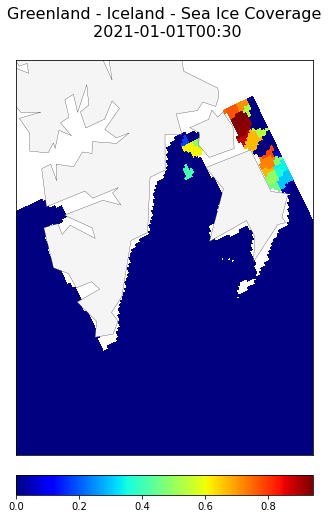

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T01:30.png


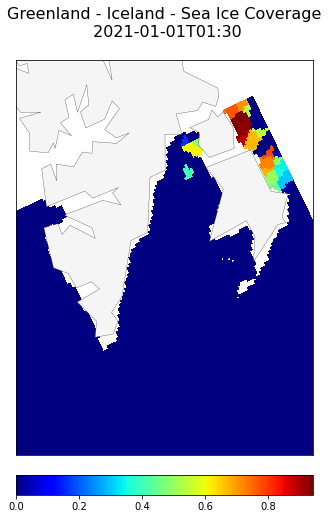

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T02:30.png


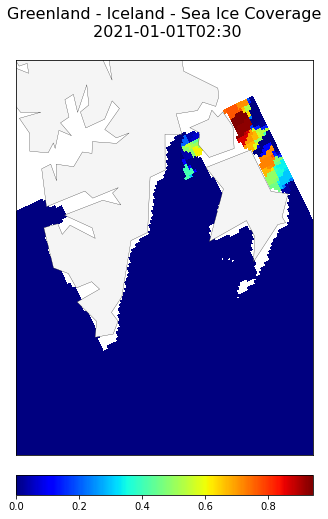

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T03:30.png


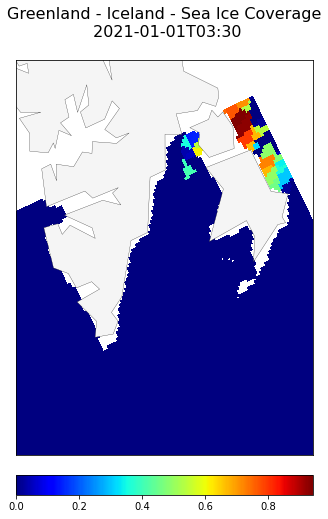

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T04:30.png


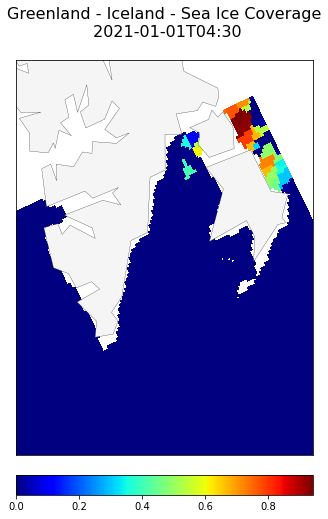

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T05:30.png


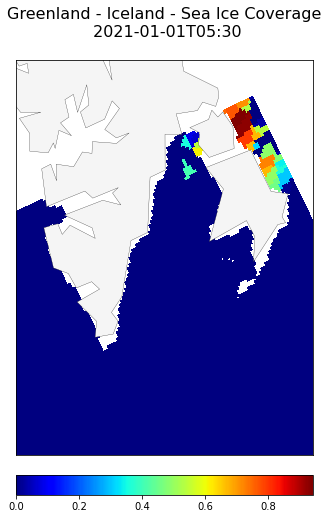

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T06:30.png


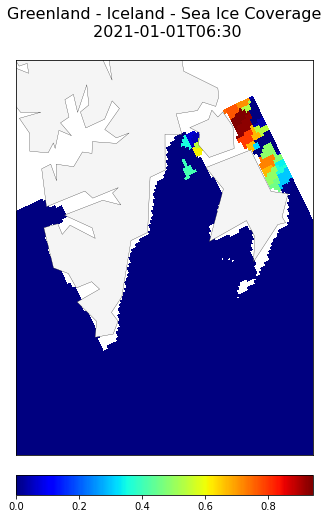

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T07:30.png


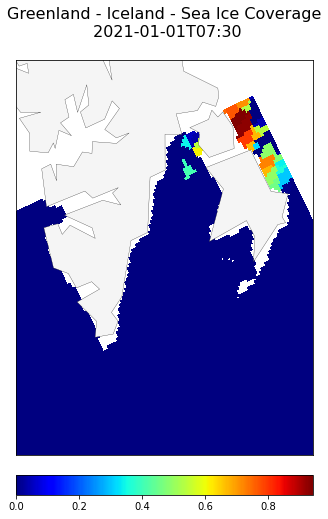

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T08:30.png


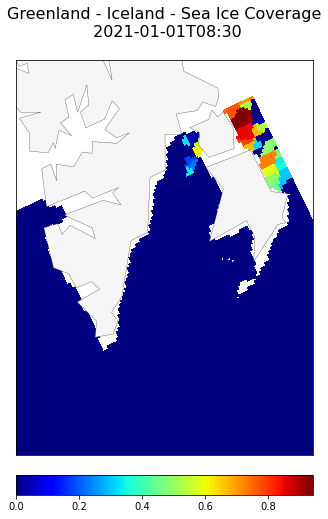

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T09:30.png


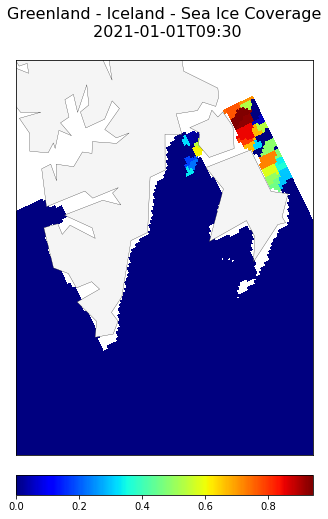

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T10:30.png


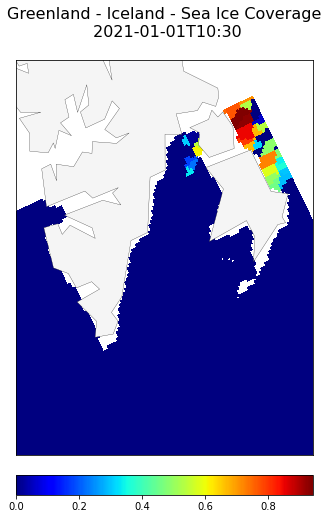

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T11:30.png


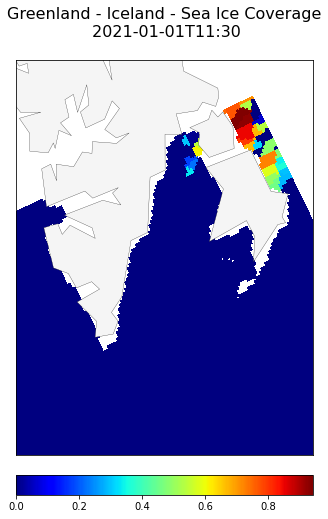

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T12:30.png


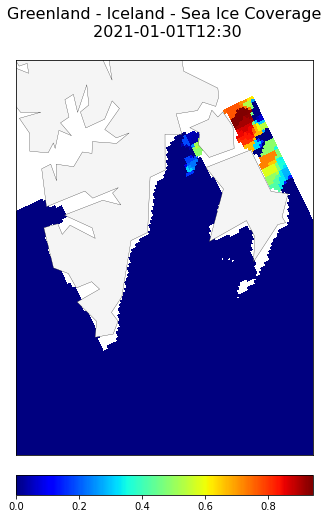

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T13:30.png


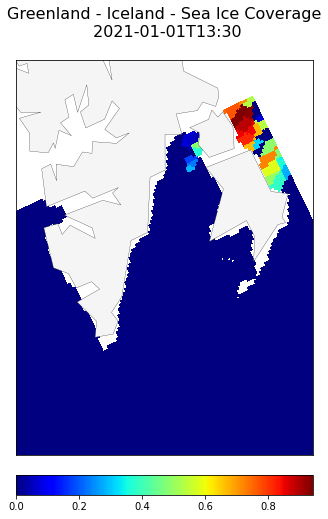

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T14:30.png


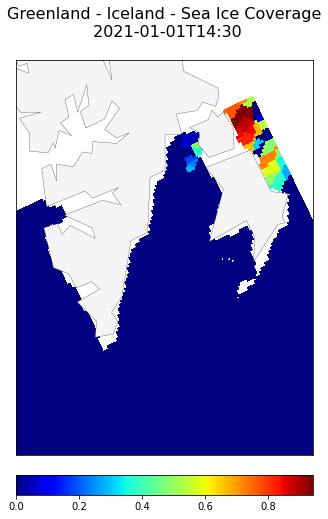

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T15:30.png


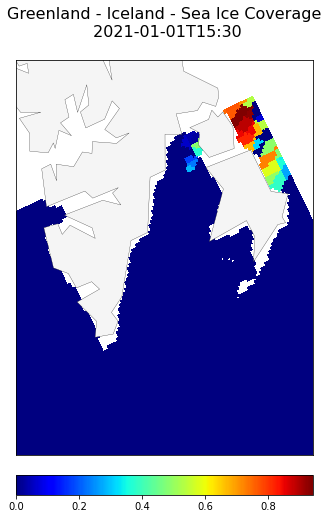

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T16:30.png


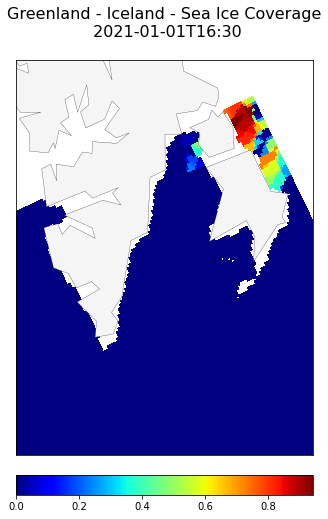

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T17:30.png


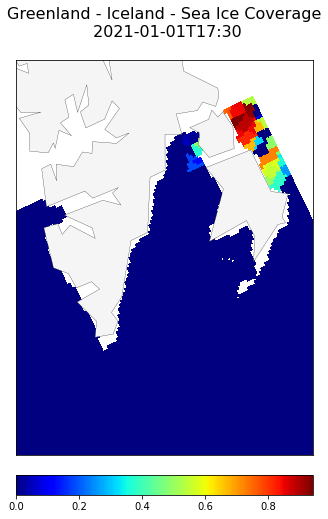

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T18:30.png


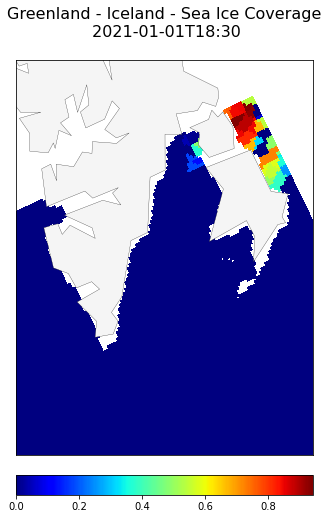

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T19:30.png


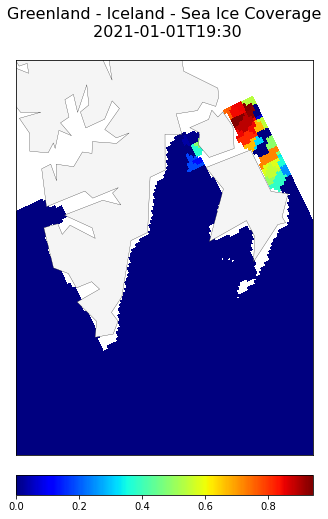

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T20:30.png


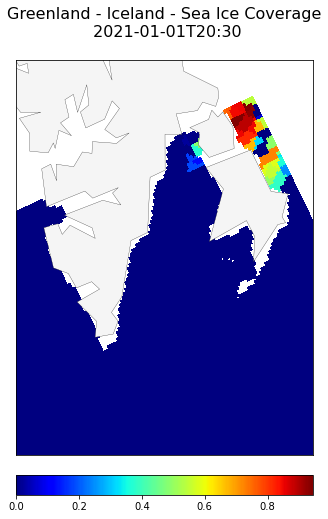

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T21:30.png


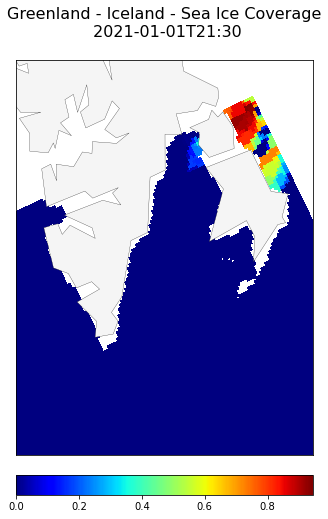

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T22:30.png


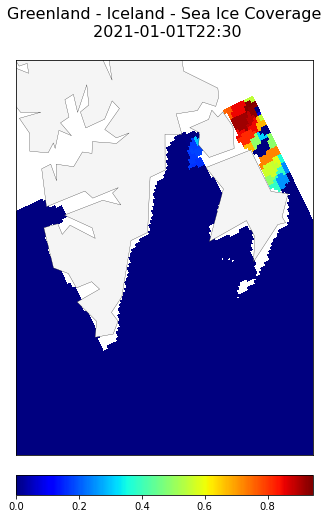

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-01T23:30.png


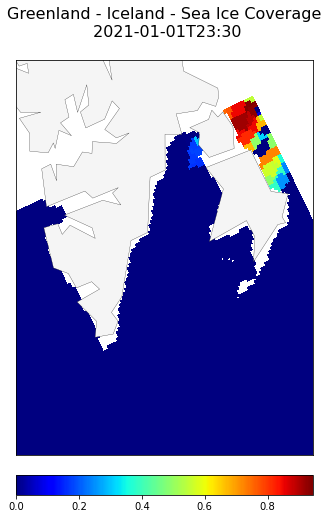

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T00:30.png


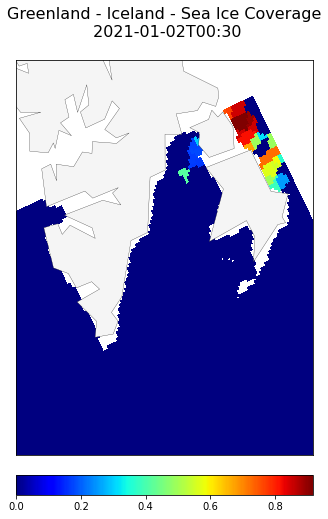

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T01:30.png


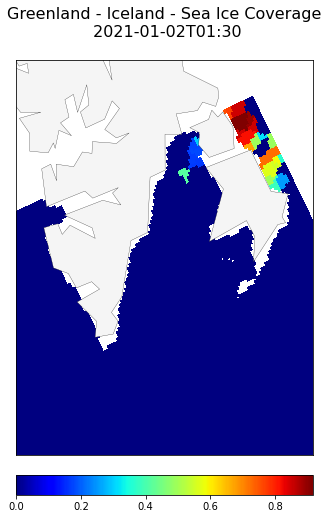

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T02:30.png


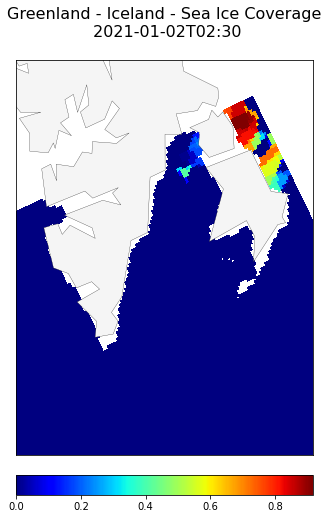

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T03:30.png


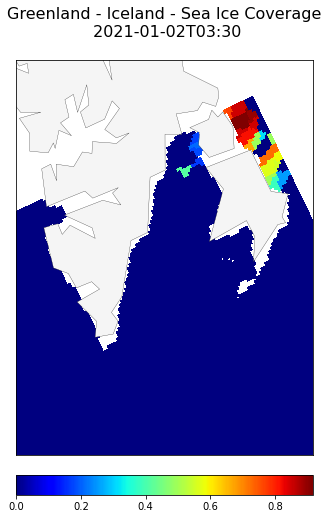

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T04:30.png


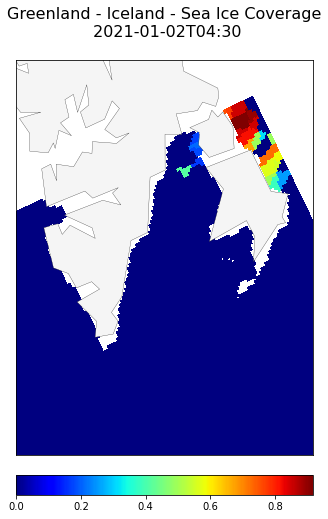

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T05:30.png


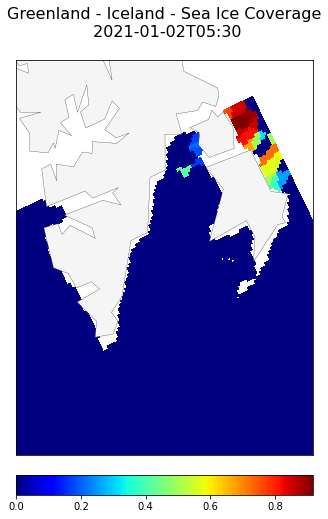

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T06:30.png


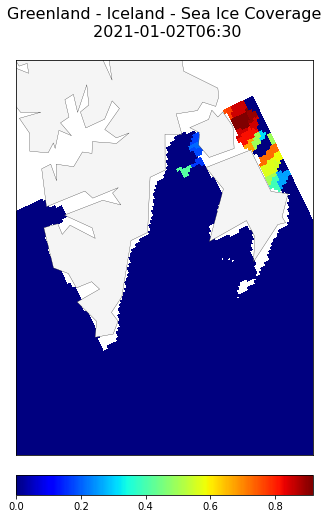

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T07:30.png


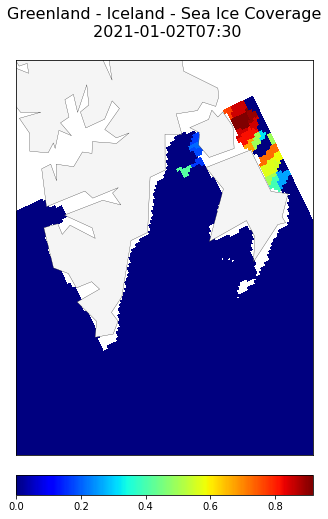

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T08:30.png


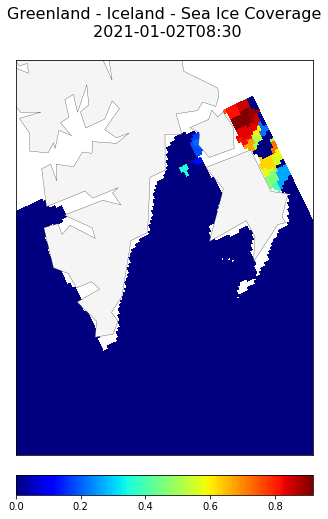

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T09:30.png


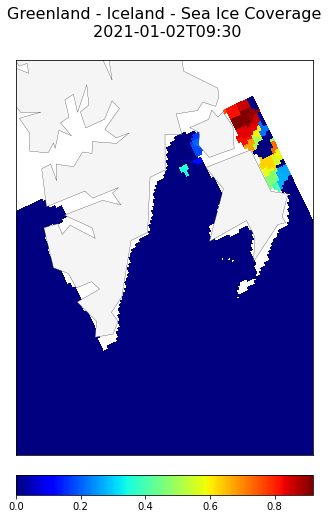

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T10:30.png


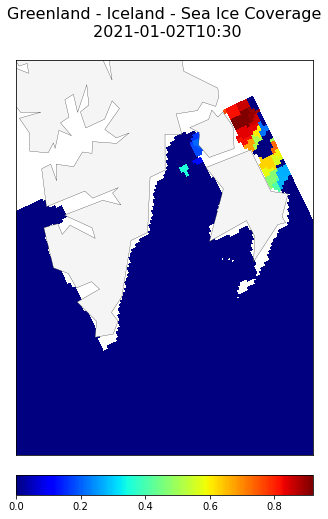

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T11:30.png


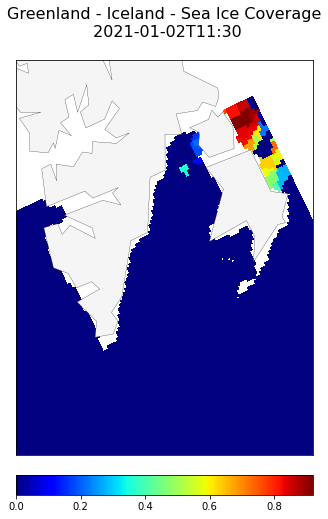

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T12:30.png


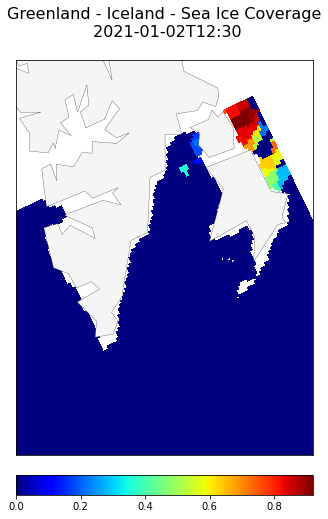

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T13:30.png


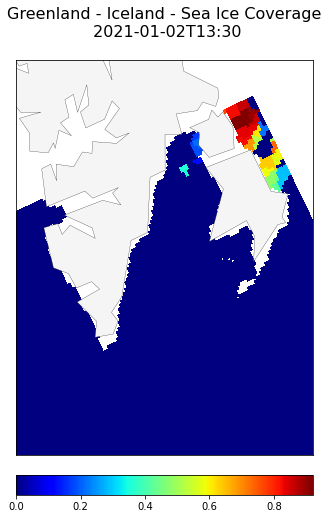

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T14:30.png


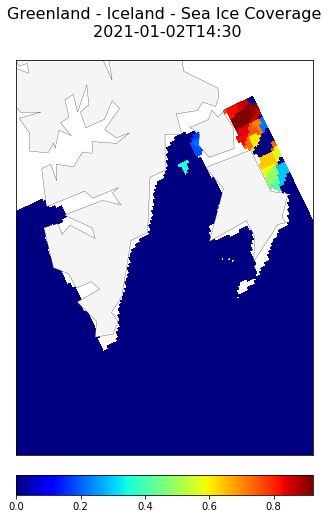

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T15:30.png


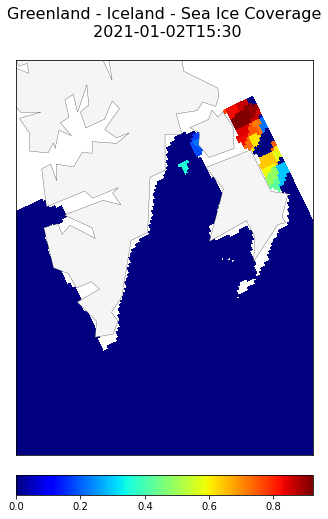

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T16:30.png


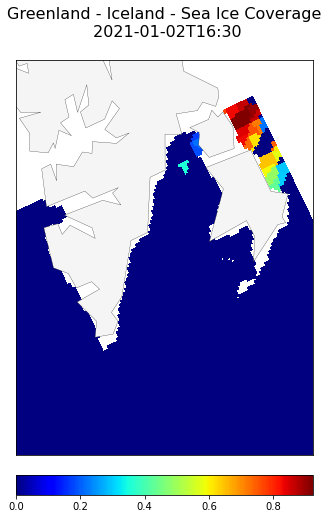

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T17:30.png


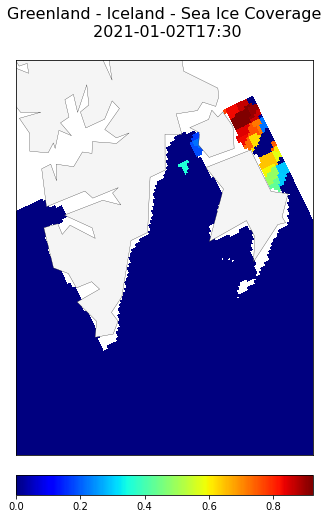

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T18:30.png


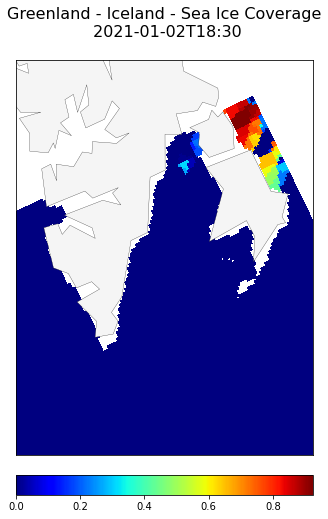

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T19:30.png


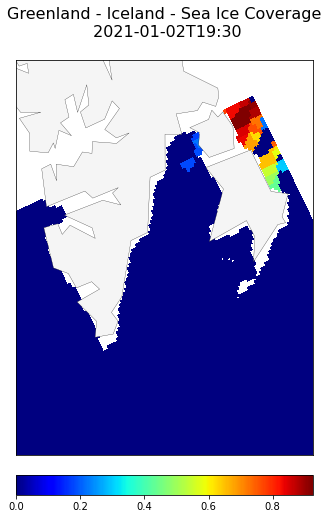

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T20:30.png


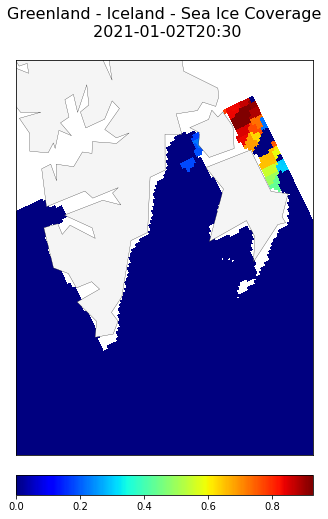

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T21:30.png


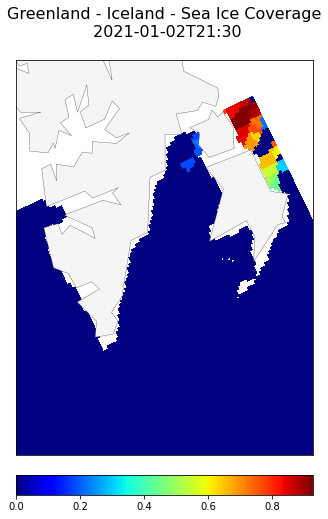

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T22:30.png


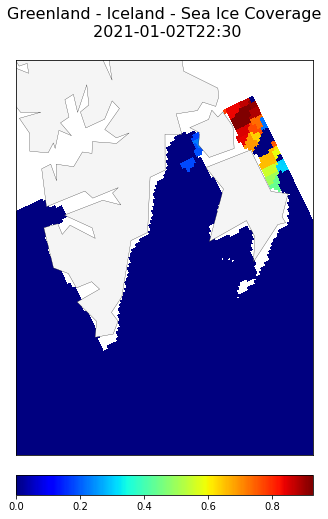

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-02T23:30.png


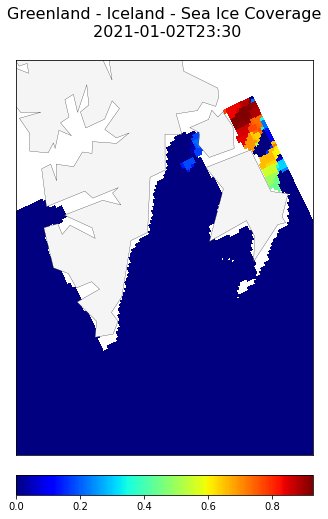

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T00:30.png


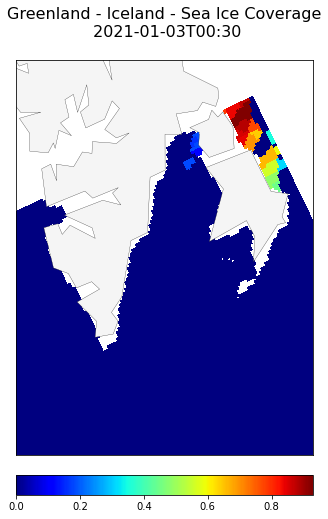

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T01:30.png


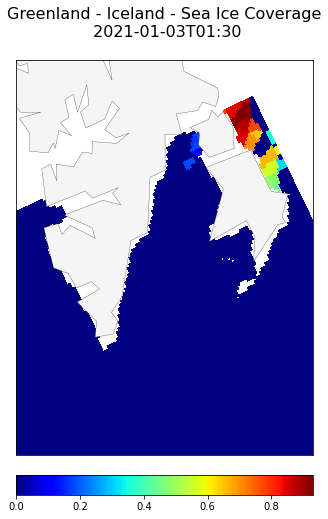

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T02:30.png


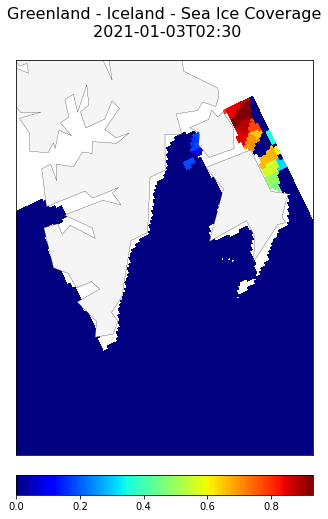

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T03:30.png


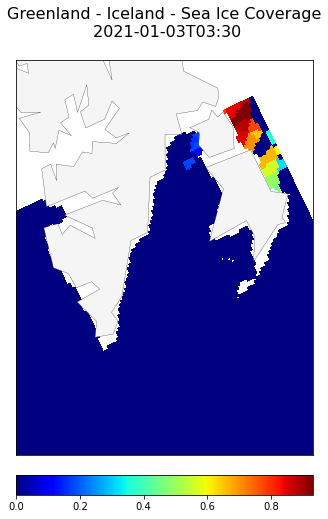

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T04:30.png


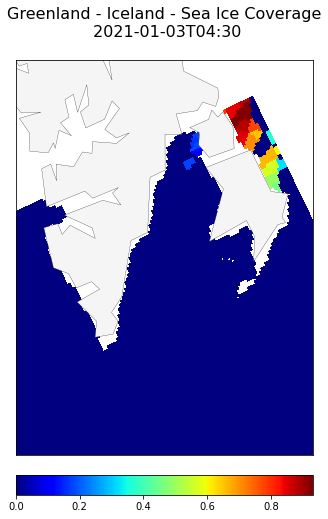

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T05:30.png


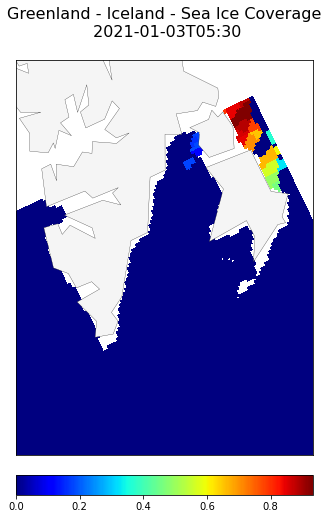

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T06:30.png


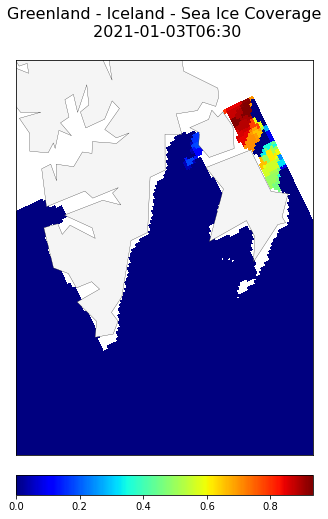

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T07:30.png


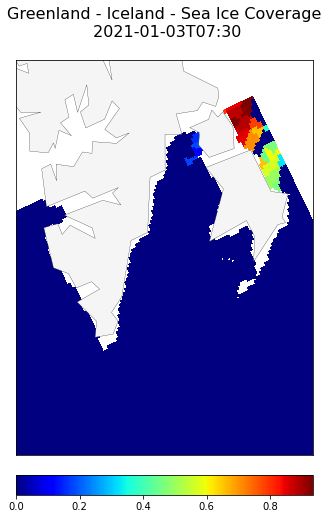

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T08:30.png


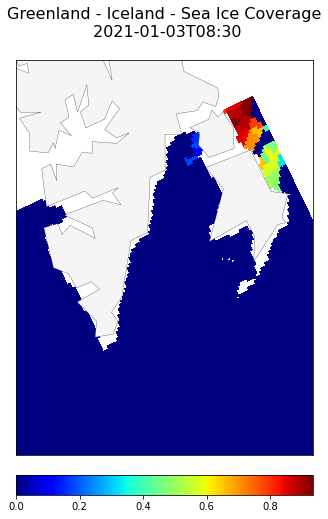

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T09:30.png


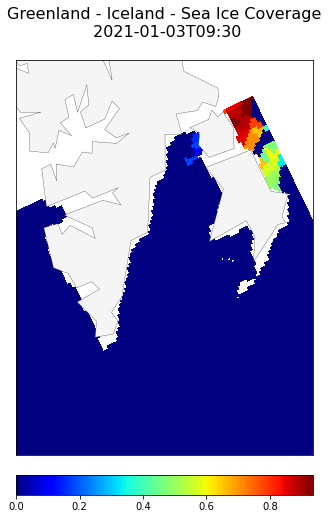

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T10:30.png


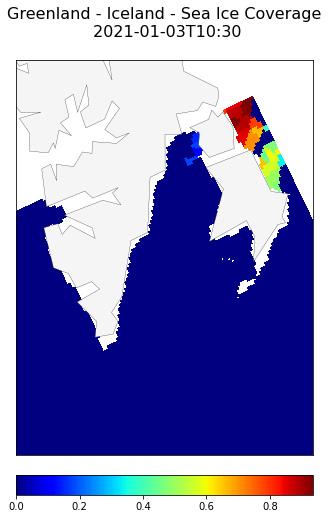

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T11:30.png


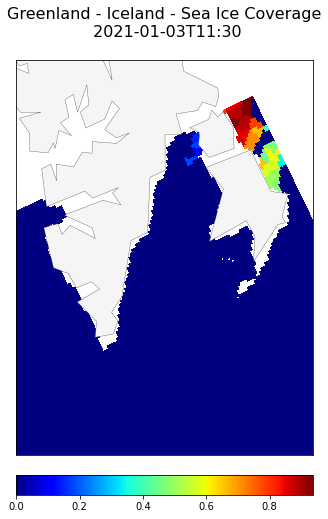

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T12:30.png


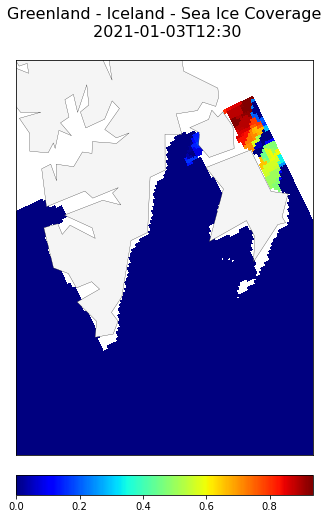

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T13:30.png


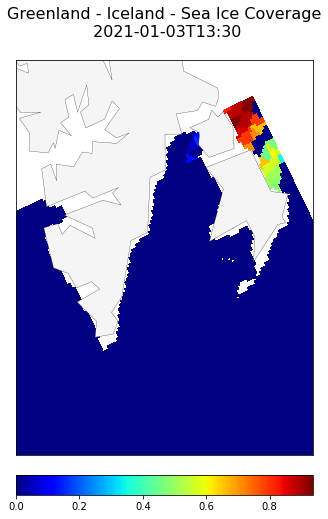

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T14:30.png


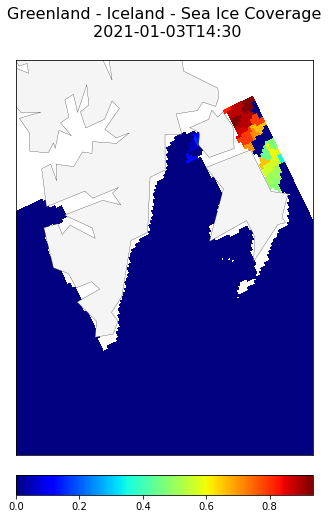

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T15:30.png


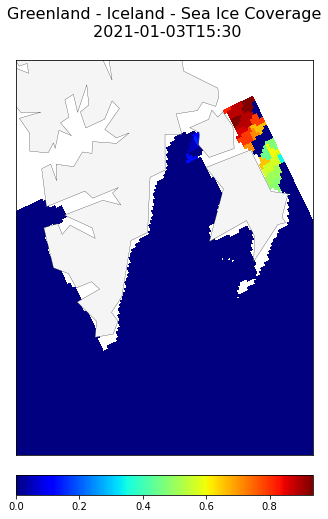

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T16:30.png


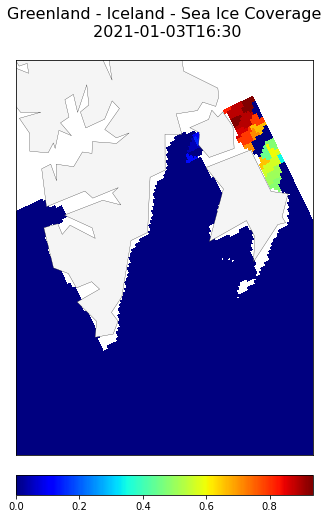

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T17:30.png


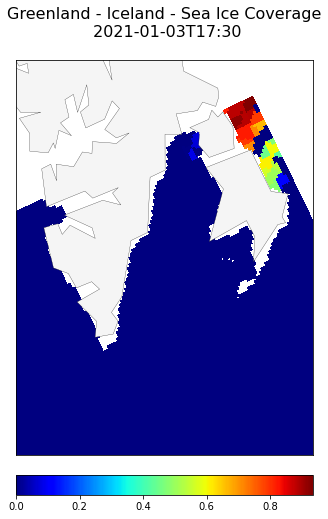

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T18:30.png


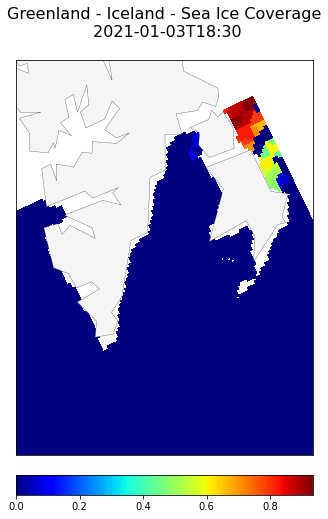

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T19:30.png


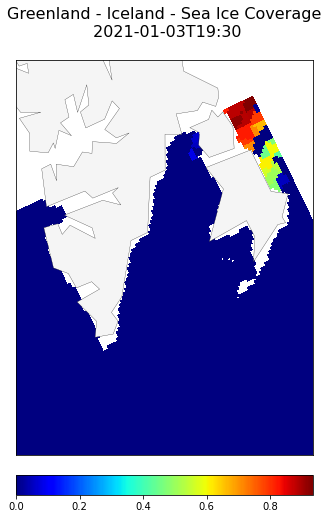

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T20:30.png


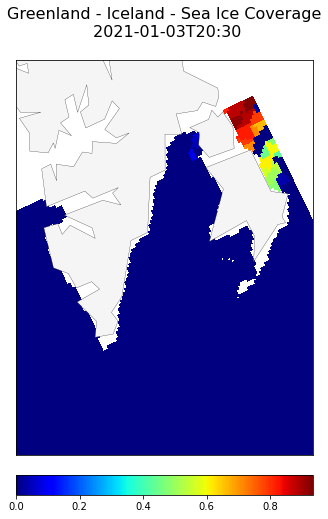

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T21:30.png


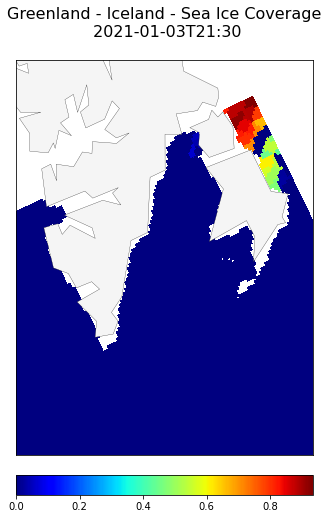

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T22:30.png


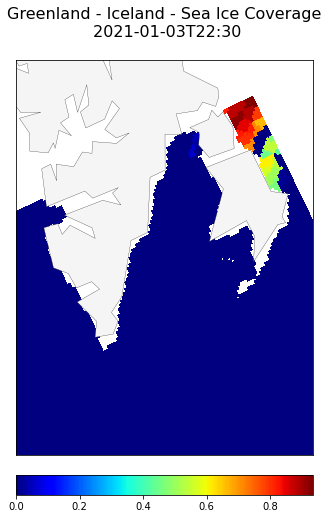

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-03T23:30.png


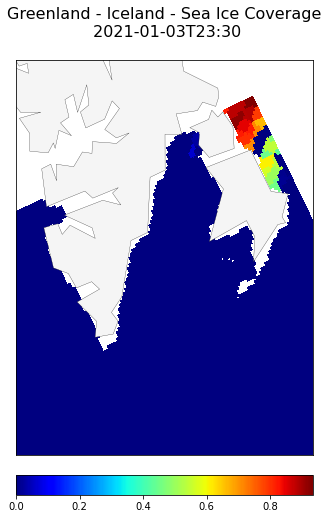

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T00:30.png


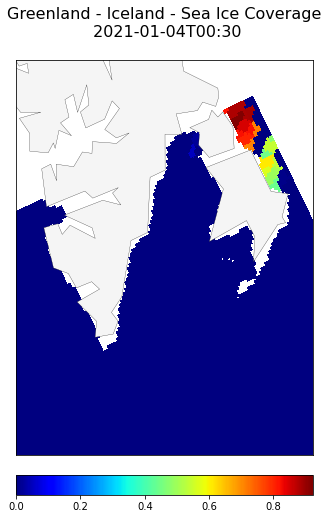

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T01:30.png


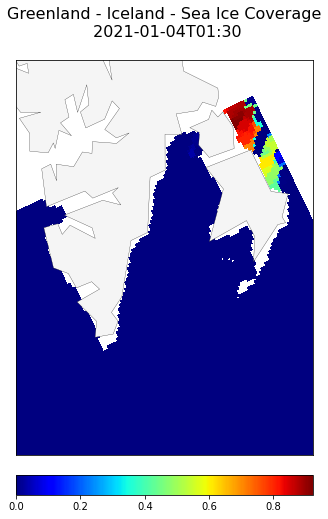

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T02:30.png


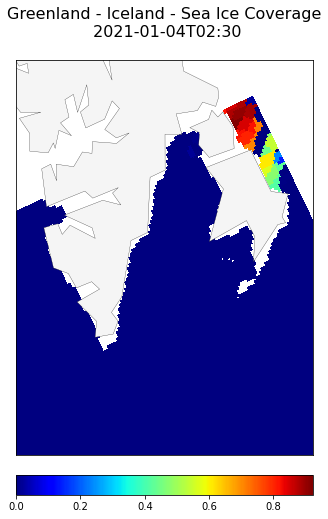

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T03:30.png


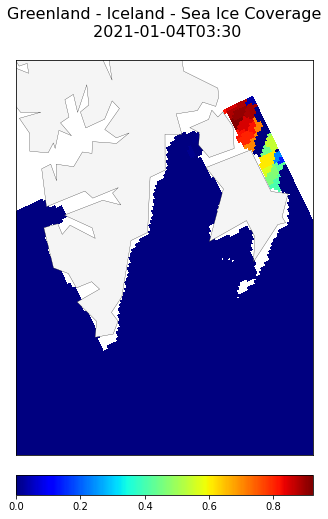

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T04:30.png


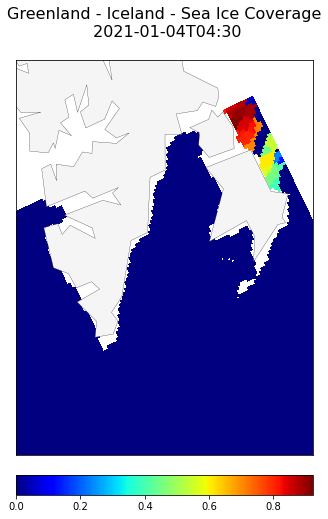

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T05:30.png


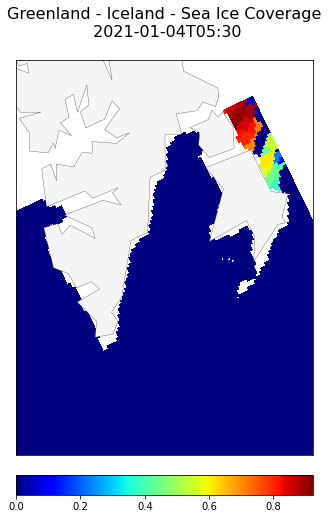

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T06:30.png


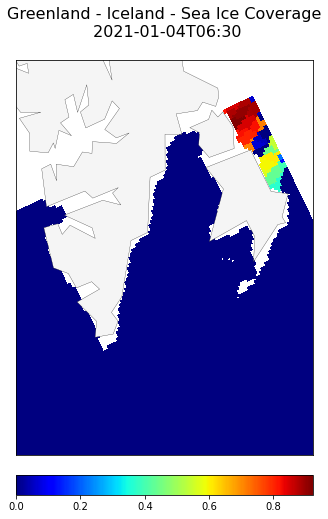

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T07:30.png


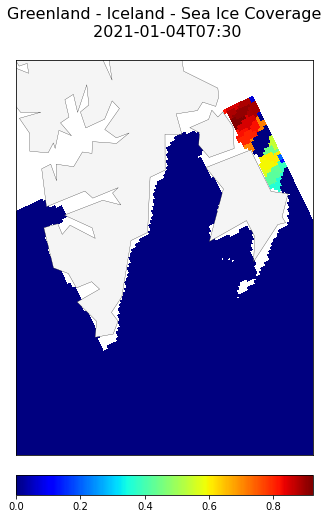

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T08:30.png


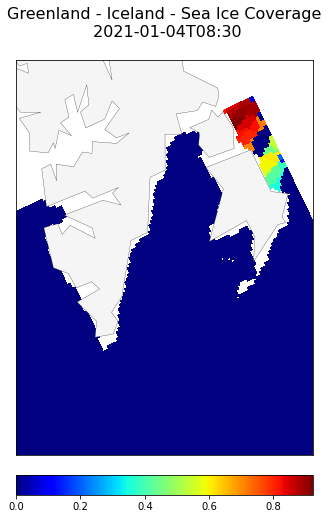

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T09:30.png


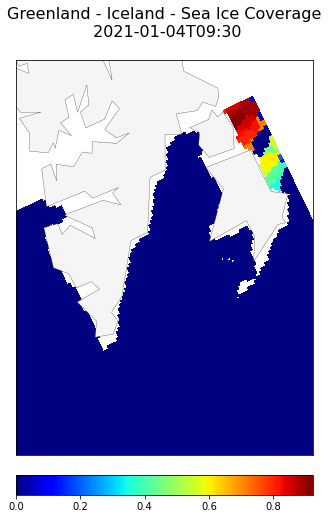

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T10:30.png


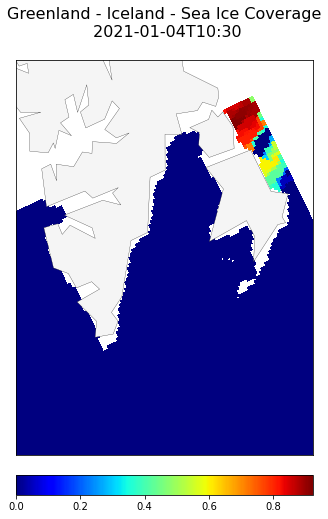

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T11:30.png


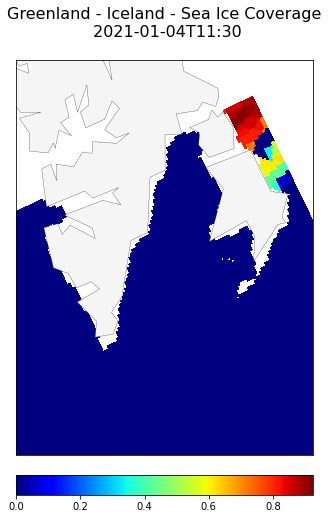

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T12:30.png


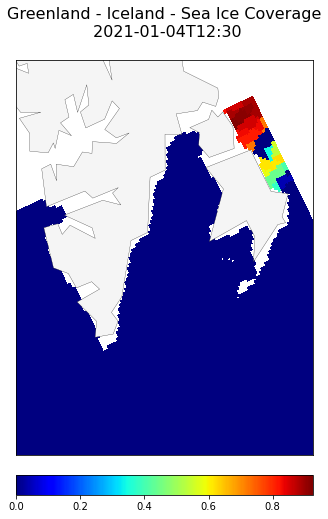

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T13:30.png


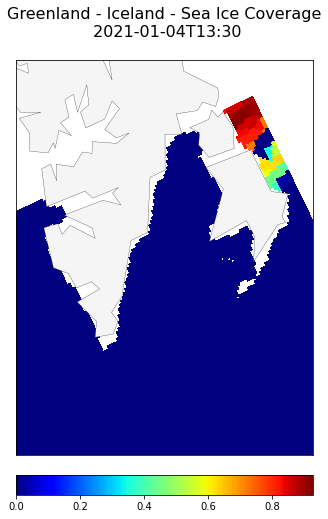

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T14:30.png


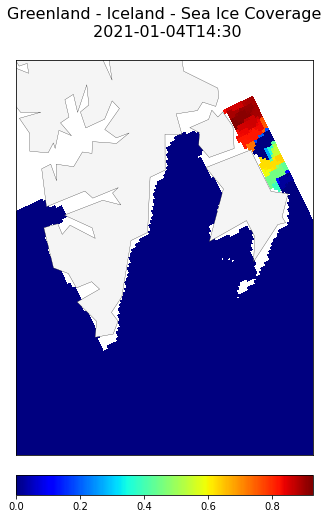

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T15:30.png


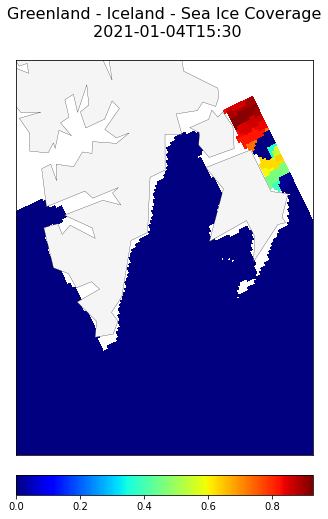

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T16:30.png


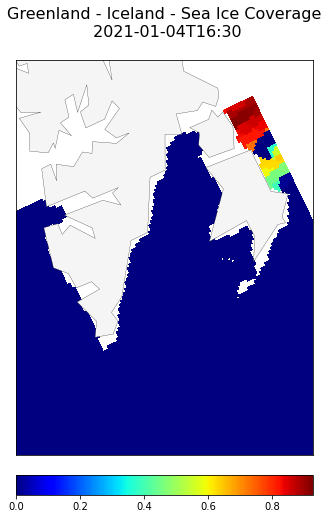

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T17:30.png


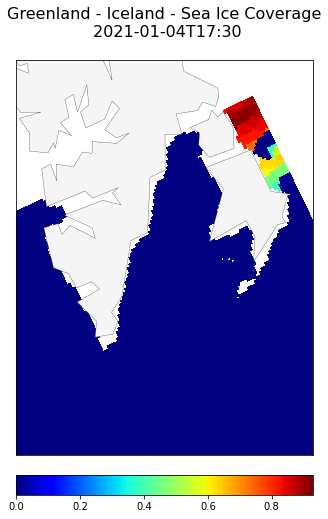

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T18:30.png


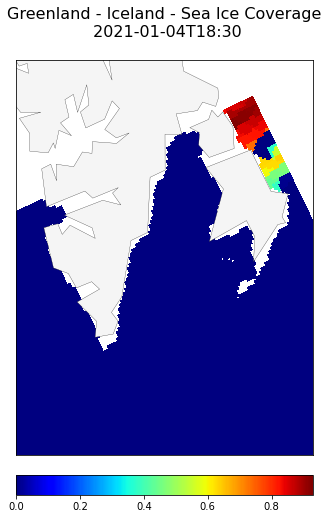

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T19:30.png


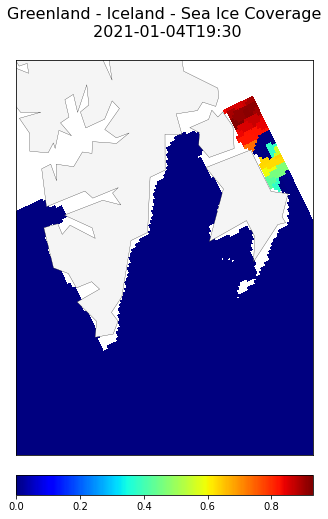

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T20:30.png


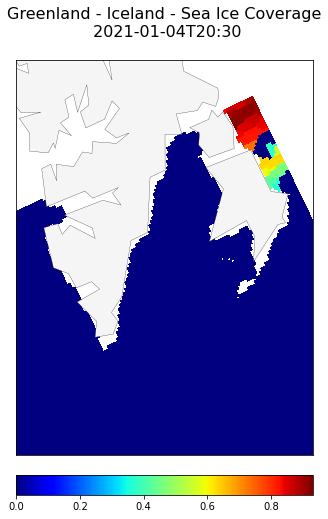

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T21:30.png


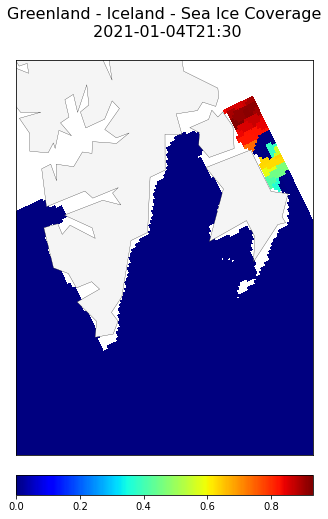

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T22:30.png


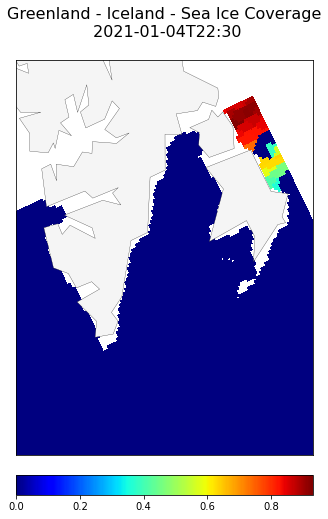

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-04T23:30.png


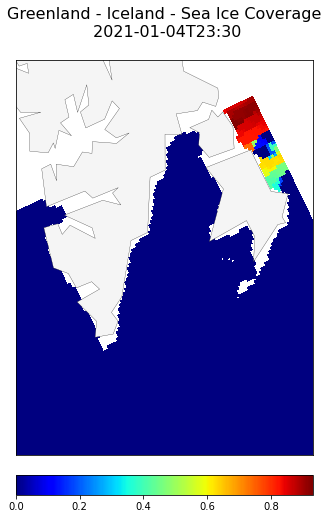

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T00:30.png


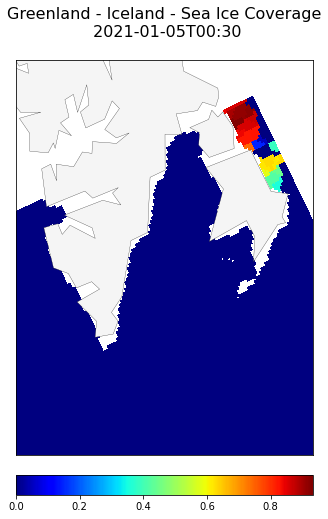

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T01:30.png


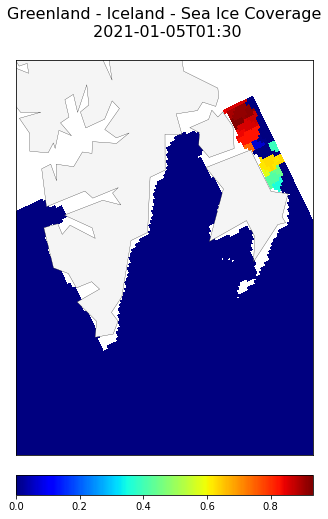

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T02:30.png


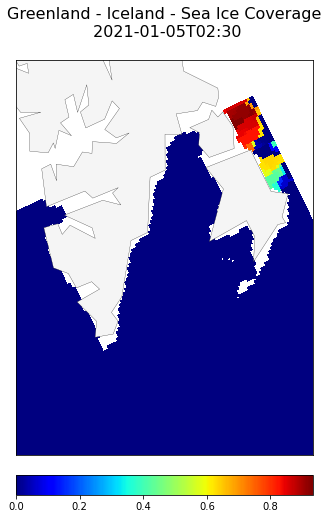

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T03:30.png


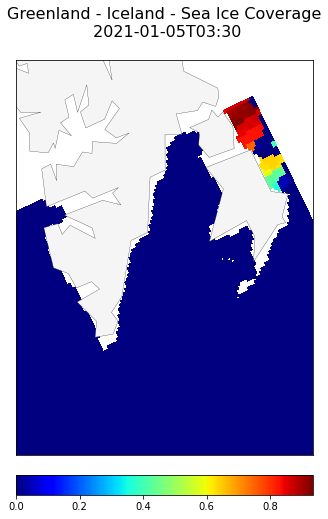

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T04:30.png


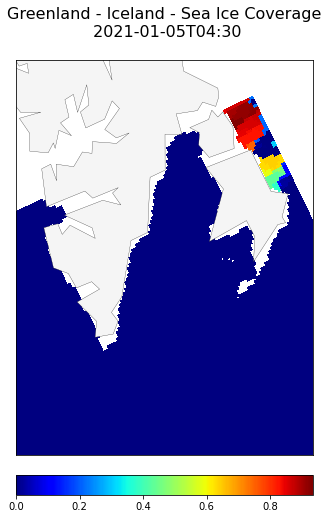

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T05:30.png


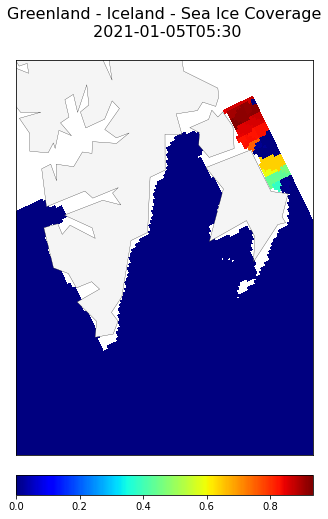

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T06:30.png


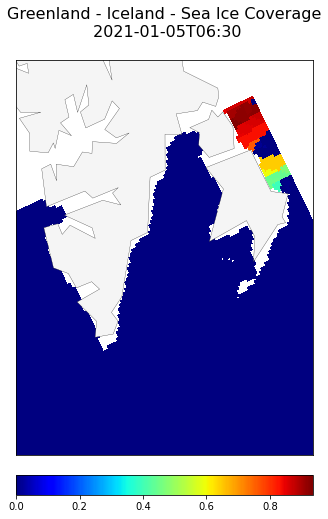

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T07:30.png


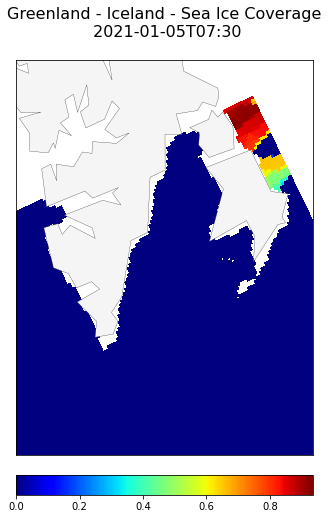

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T08:30.png


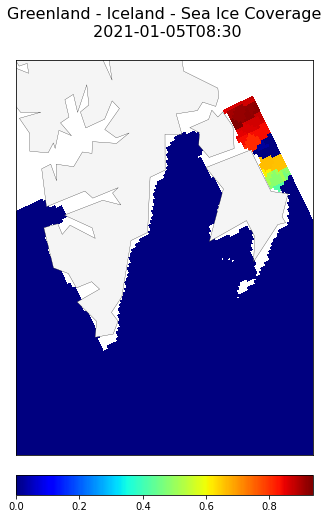

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T09:30.png


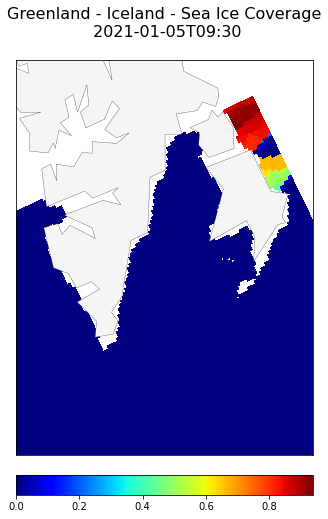

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T10:30.png


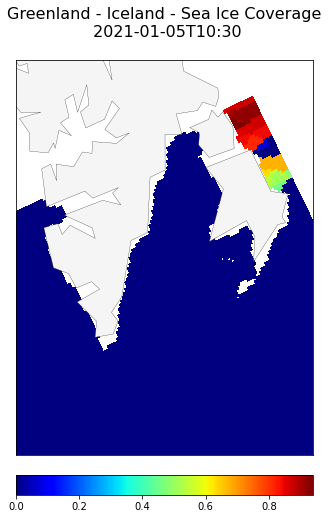

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T11:30.png


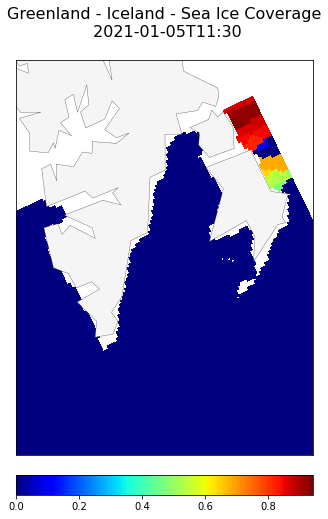

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T12:30.png


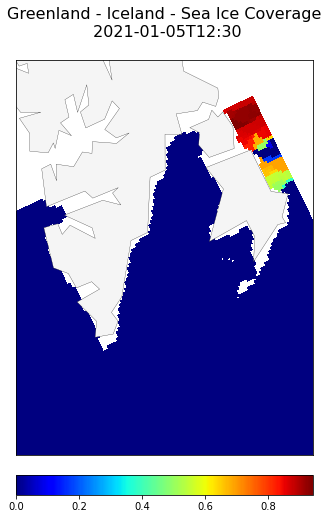

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T13:30.png


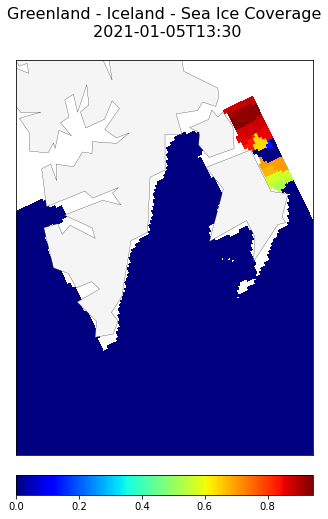

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T14:30.png


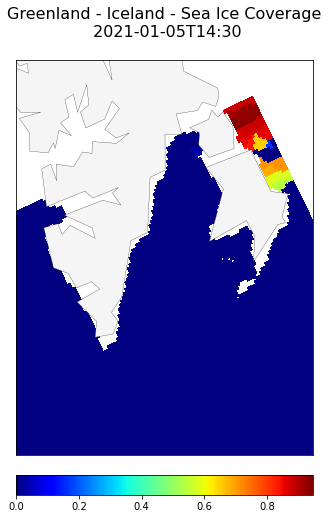

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T15:30.png


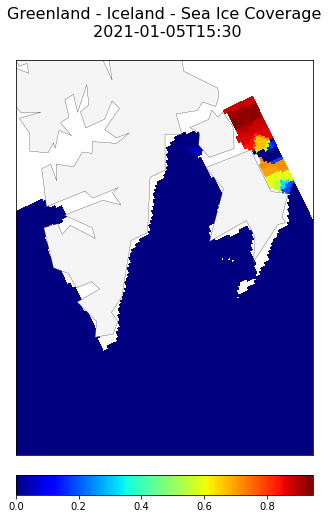

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T16:30.png


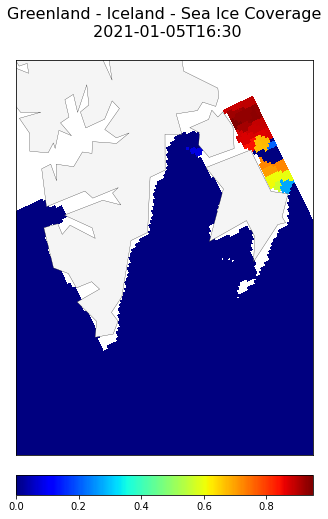

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T17:30.png


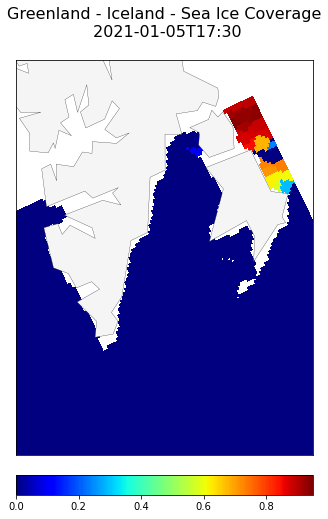

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T18:30.png


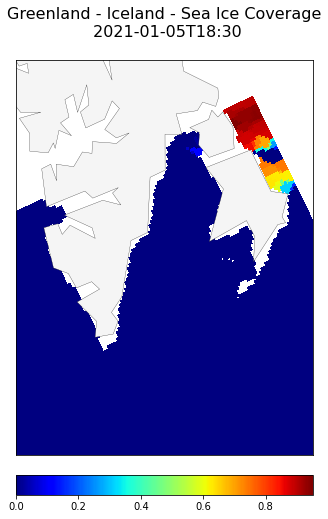

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T19:30.png


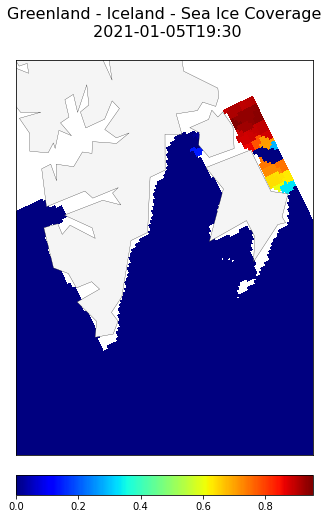

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T20:30.png


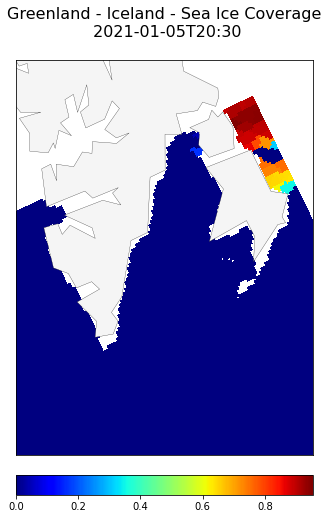

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T21:30.png


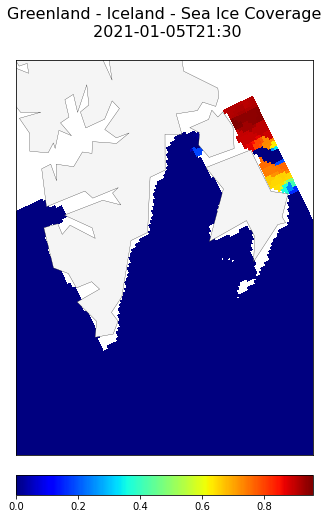

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T22:30.png


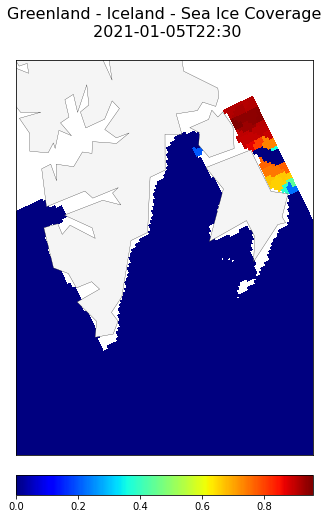

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-05T23:30.png


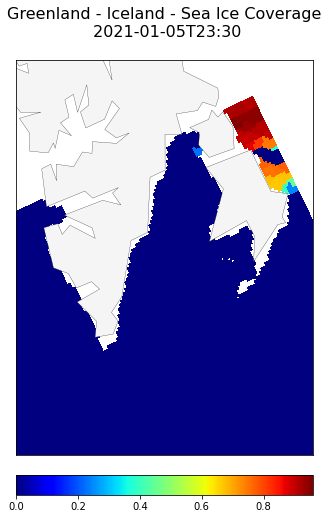

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T00:30.png


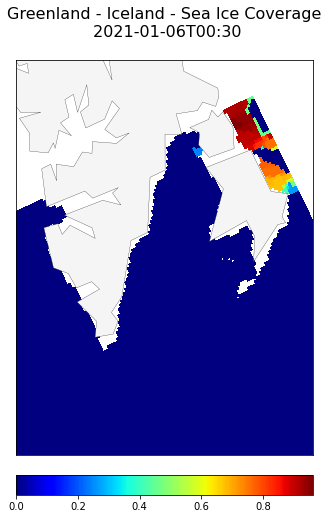

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T01:30.png


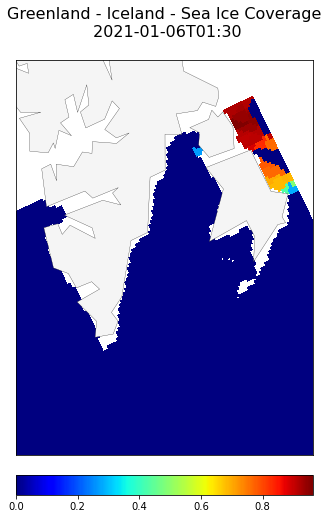

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T02:30.png


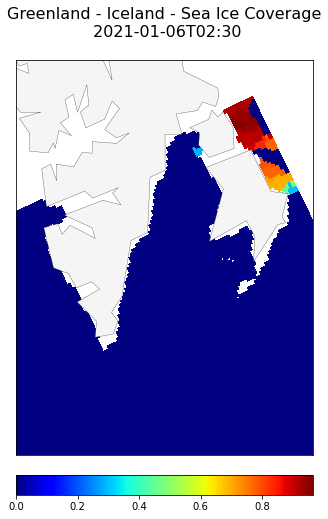

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T03:30.png


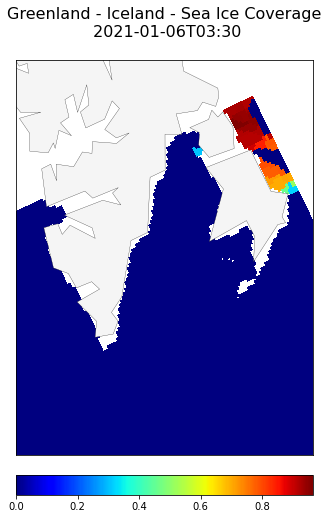

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T04:30.png


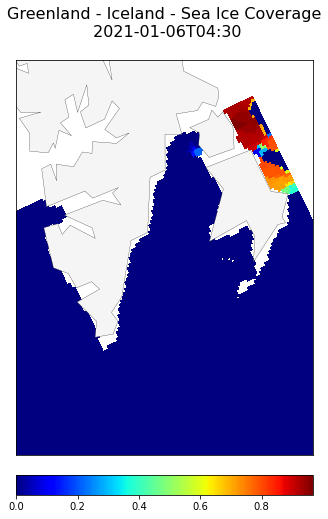

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T05:30.png


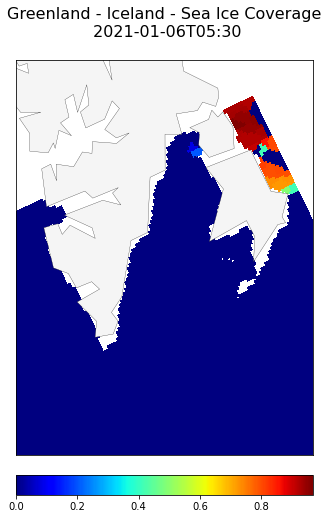

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T06:30.png


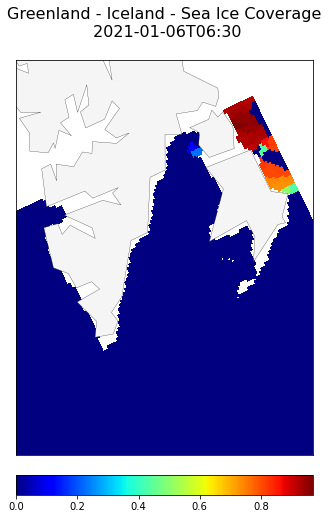

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T07:30.png


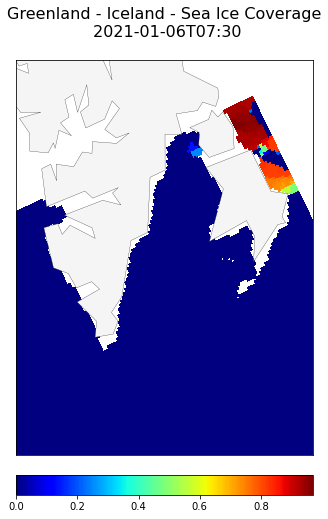

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T08:30.png


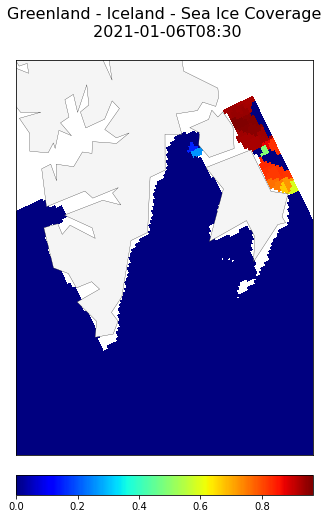

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T09:30.png


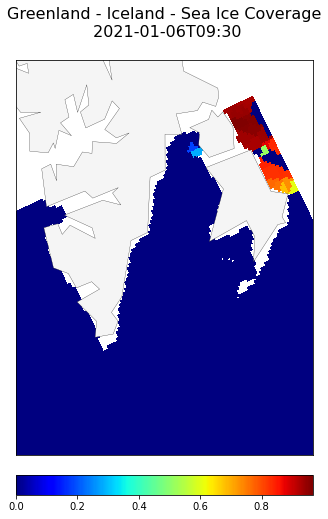

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T10:30.png


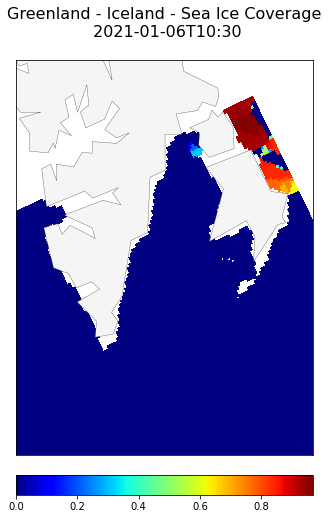

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T11:30.png


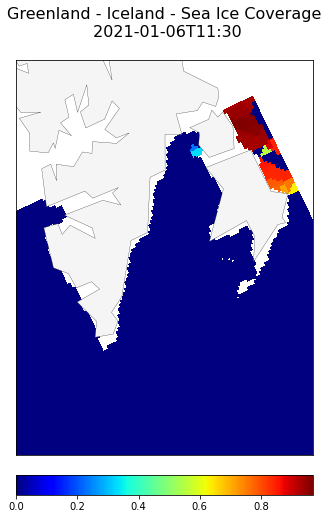

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T12:30.png


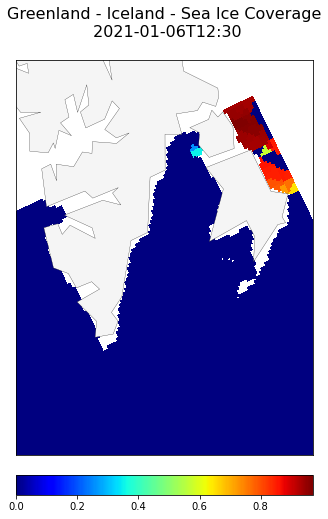

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T13:30.png


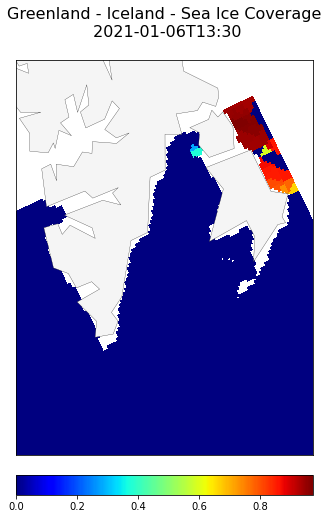

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T14:30.png


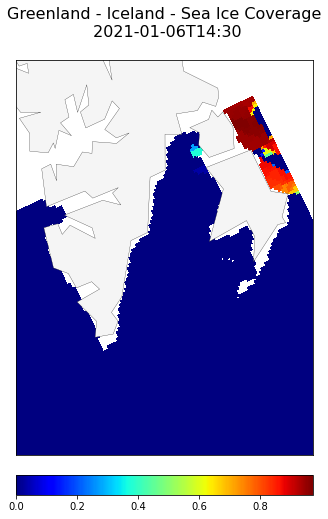

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T15:30.png


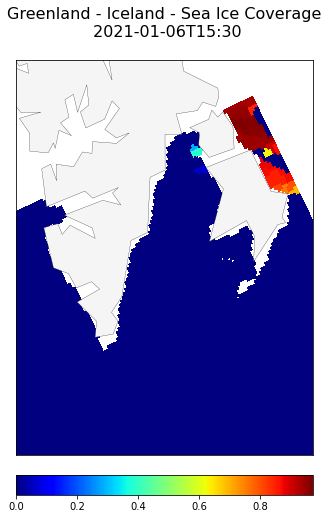

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T16:30.png


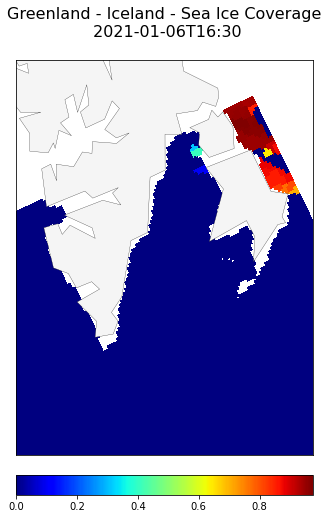

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T17:30.png


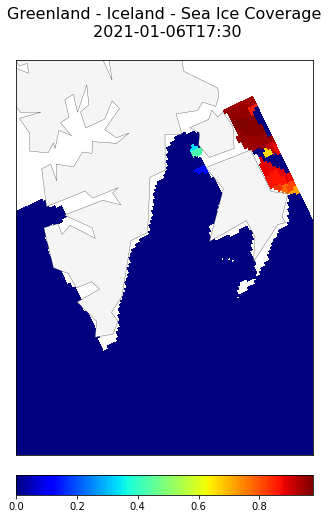

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T18:30.png


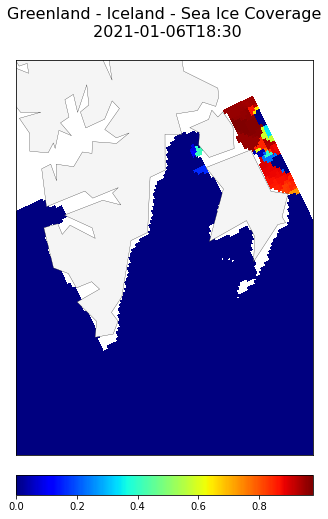

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T19:30.png


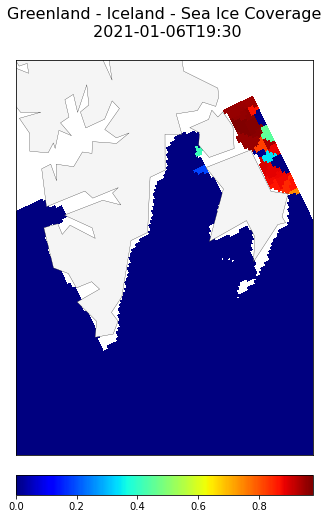

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T20:30.png


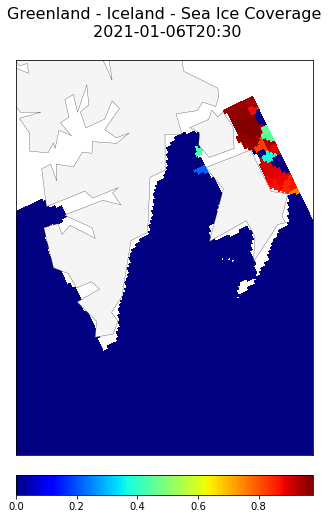

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T21:30.png


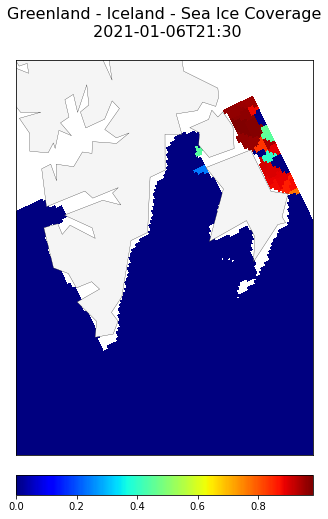

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T22:30.png


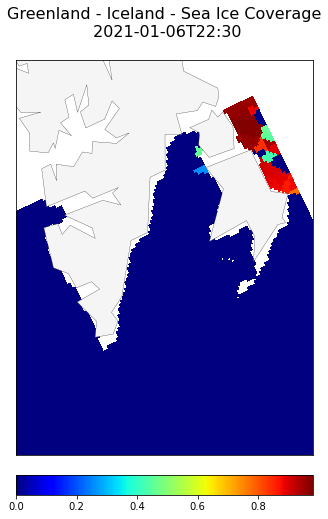

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-06T23:30.png


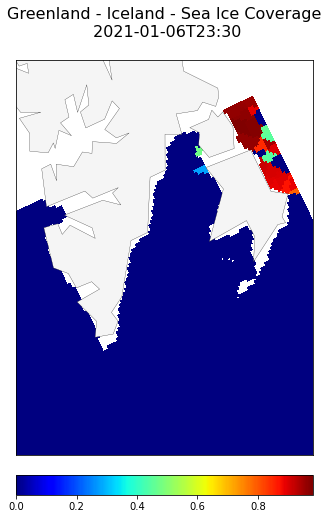

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T00:30.png


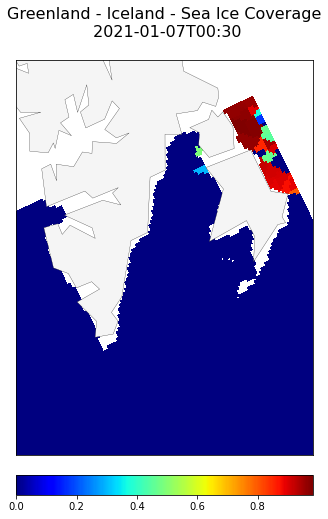

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T01:30.png


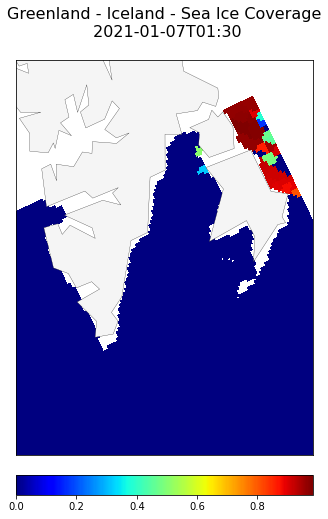

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T02:30.png


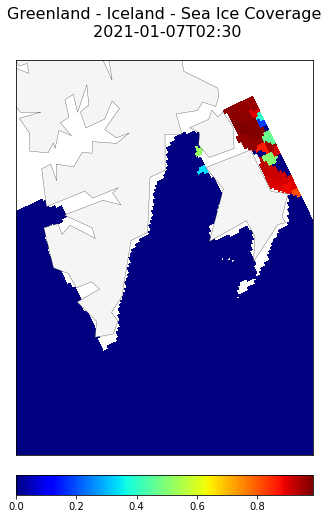

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T03:30.png


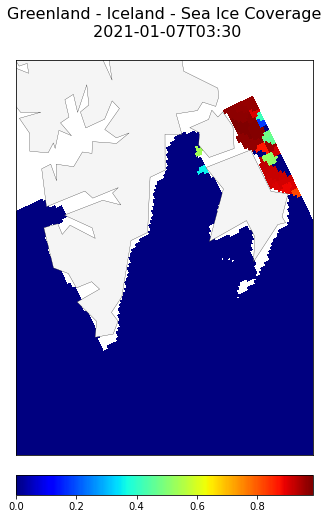

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T04:30.png


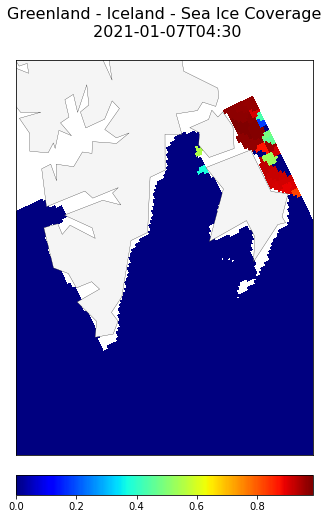

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T05:30.png


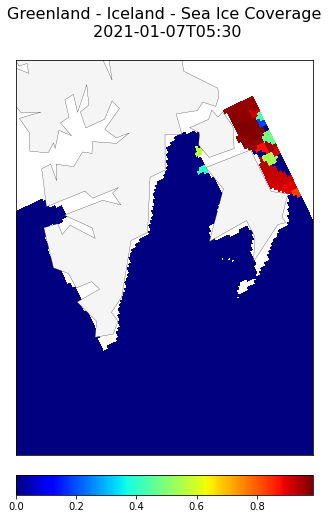

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T06:30.png


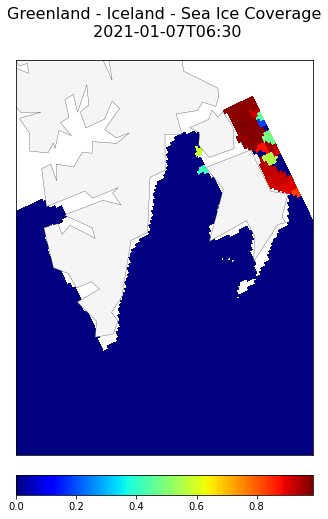

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T07:30.png


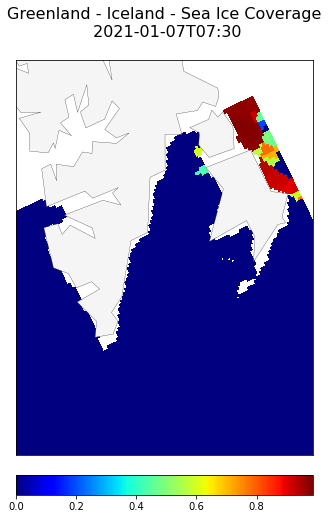

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T08:30.png


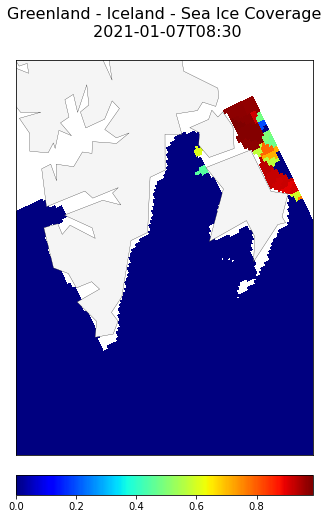

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T09:30.png


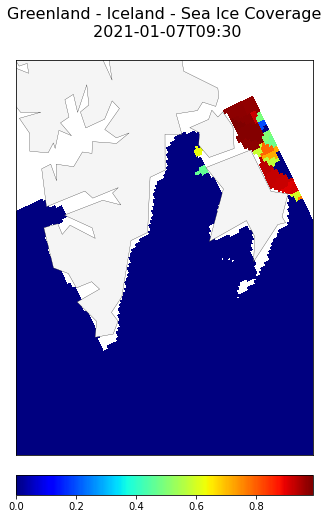

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T10:30.png


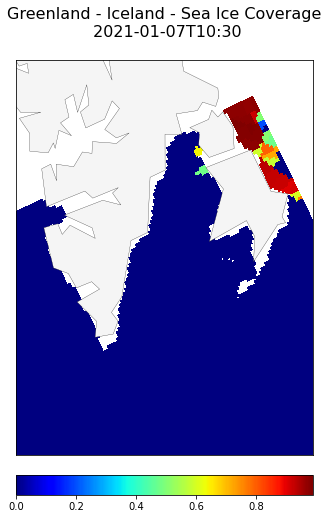

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T11:30.png


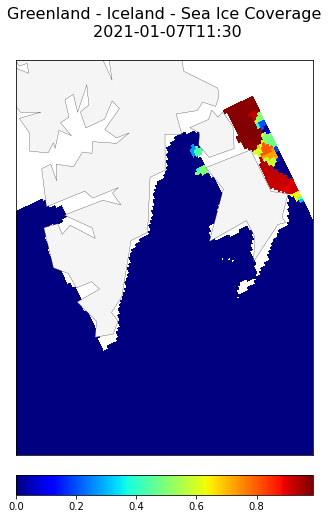

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T12:30.png


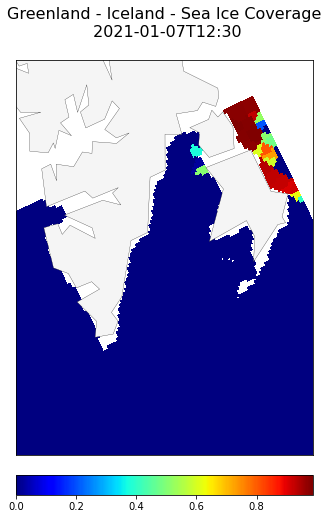

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T13:30.png


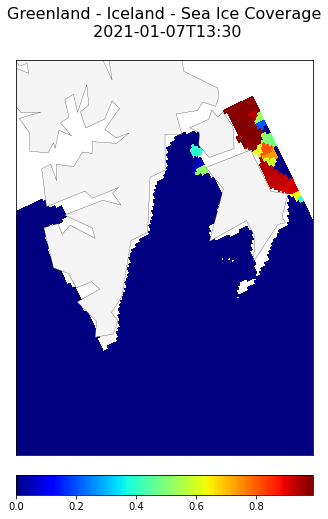

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T14:30.png


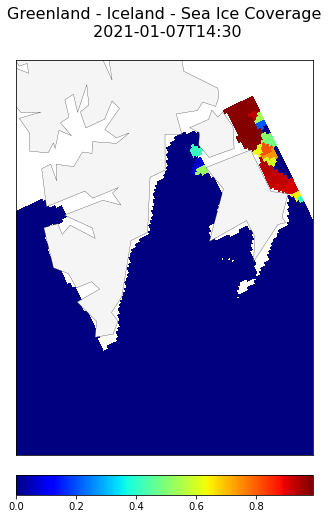

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T15:30.png


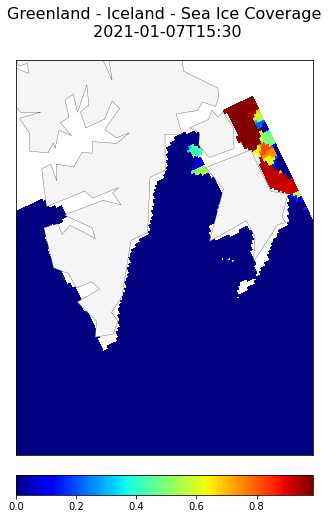

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T16:30.png


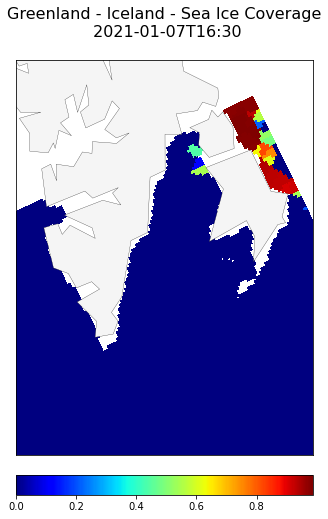

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T17:30.png


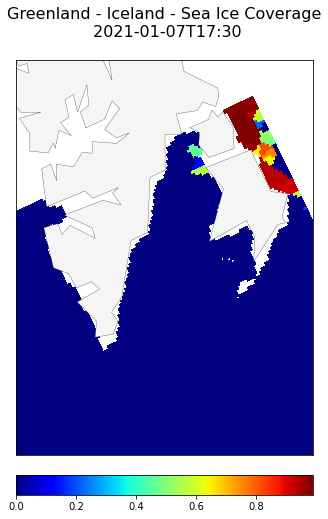

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T18:30.png


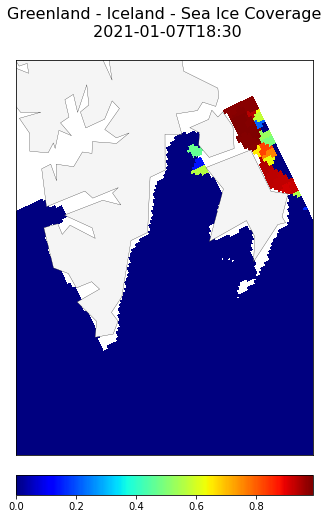

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T19:30.png


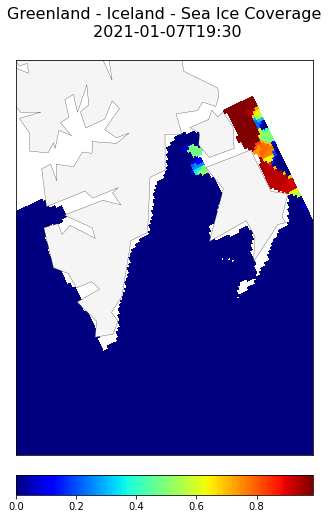

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T20:30.png


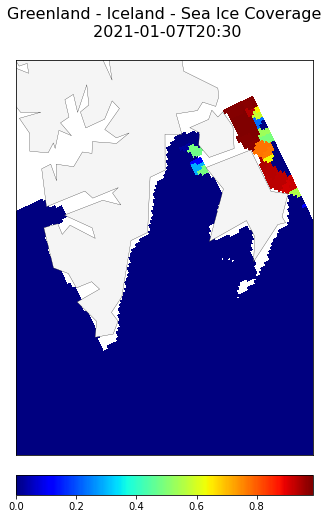

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T21:30.png


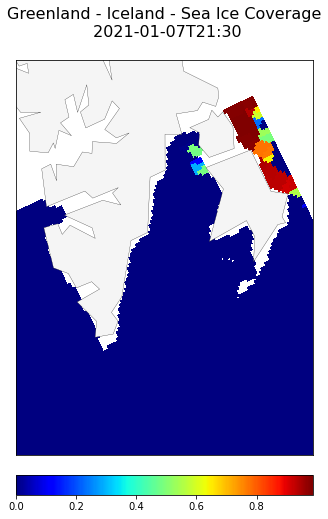

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T22:30.png


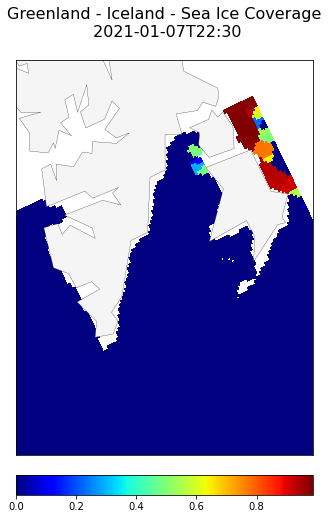

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-07T23:30.png


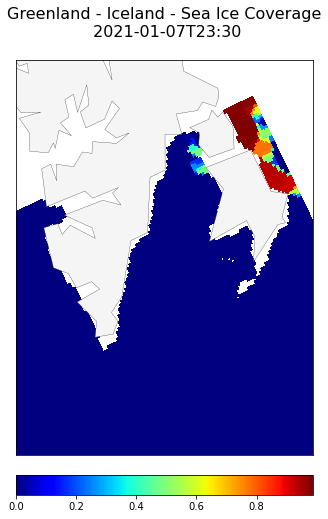

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T00:30.png


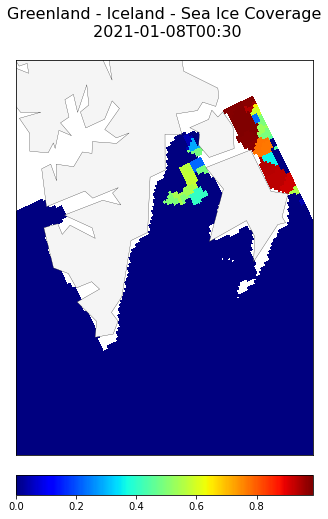

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T01:30.png


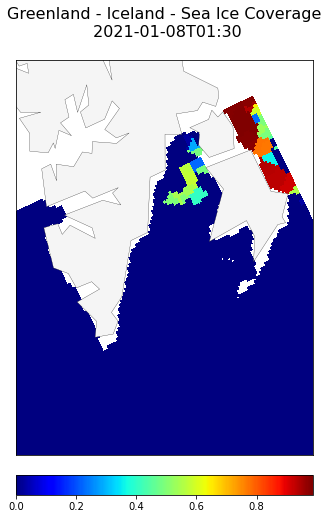

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T02:30.png


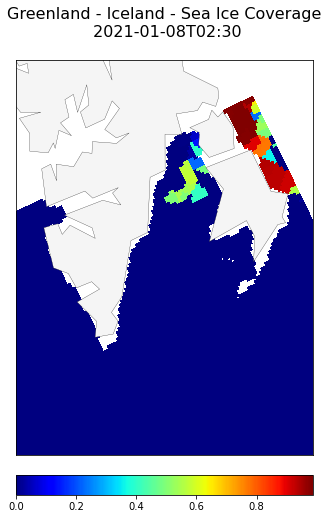

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T03:30.png


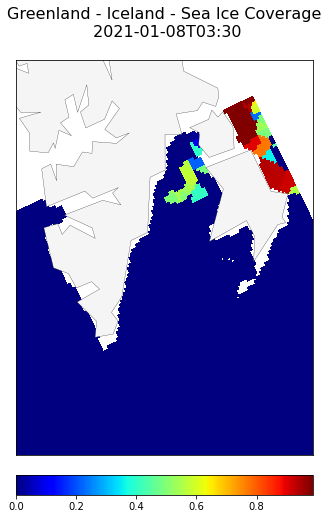

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T04:30.png


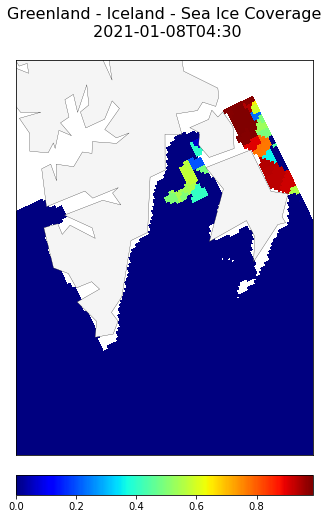

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T05:30.png


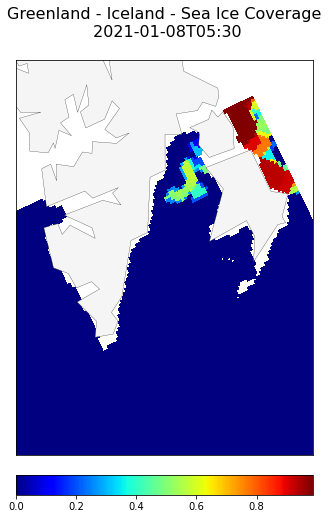

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T06:30.png


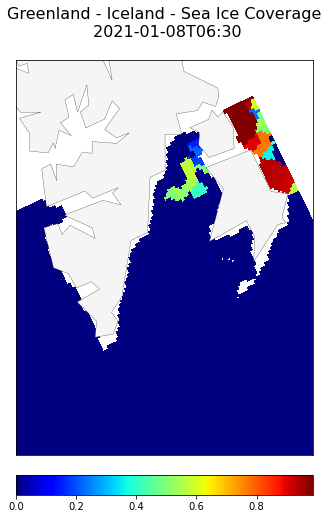

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T07:30.png


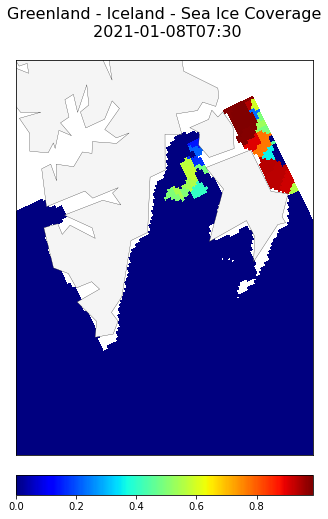

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T08:30.png


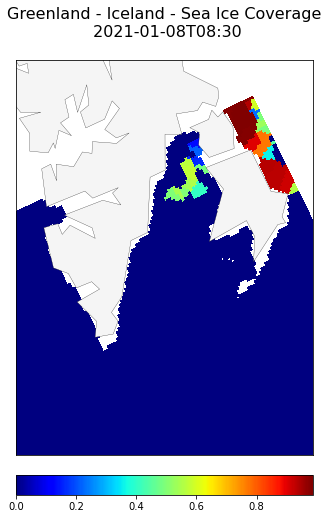

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T09:30.png


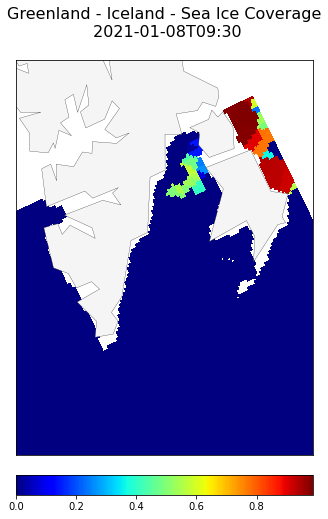

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T10:30.png


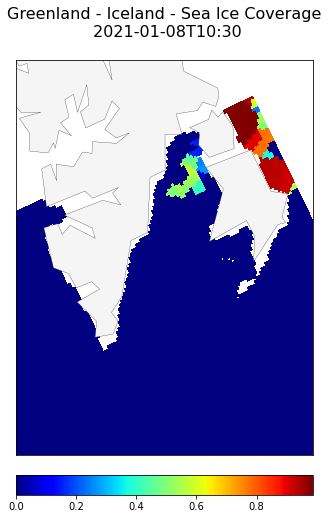

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T11:30.png


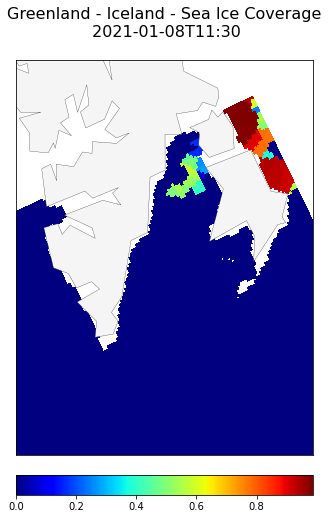

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T12:30.png


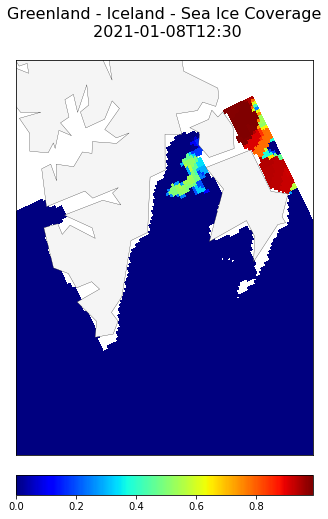

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T13:30.png


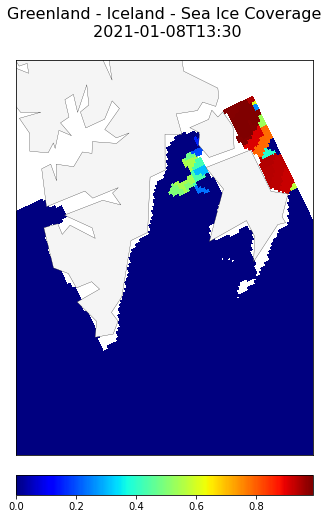

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T14:30.png


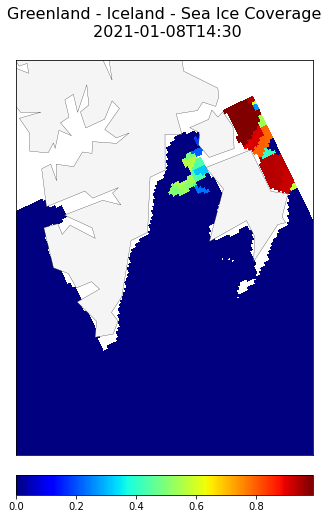

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T15:30.png


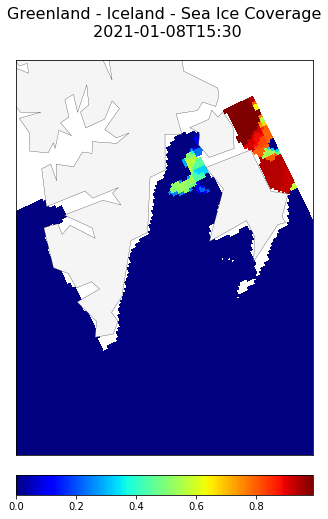

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T16:30.png


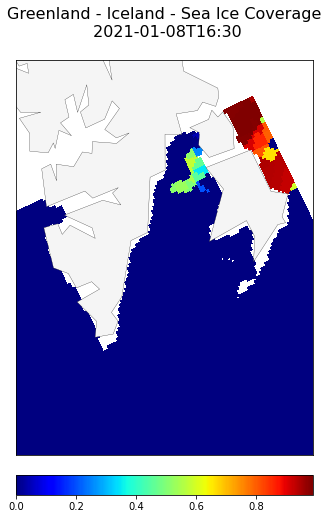

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T17:30.png


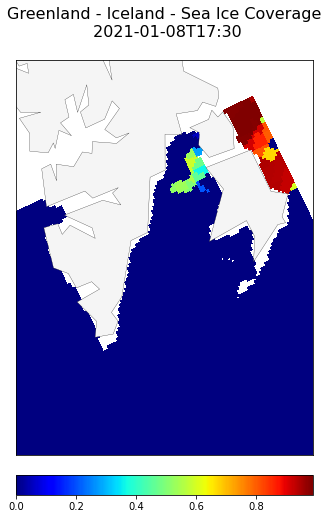

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T18:30.png


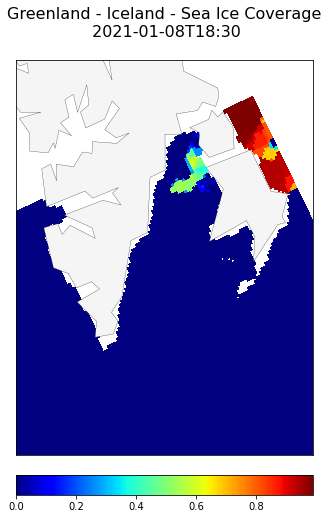

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T19:30.png


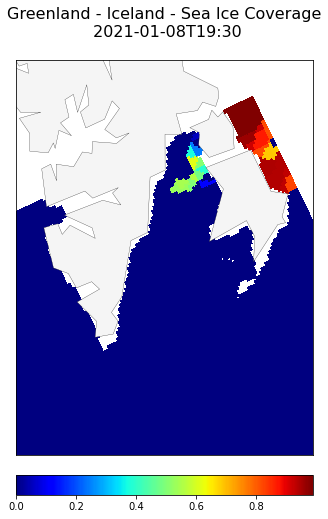

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T20:30.png


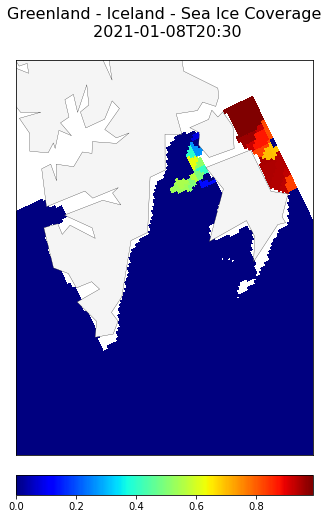

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T21:30.png


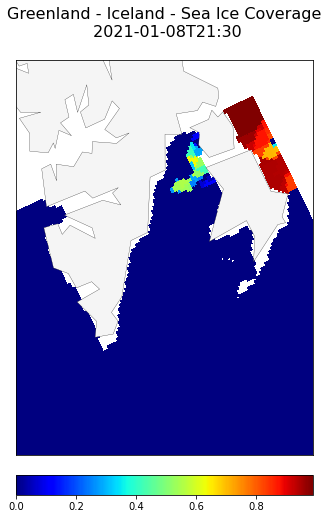

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T22:30.png


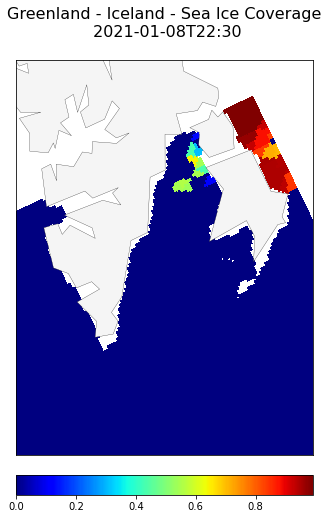

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-08T23:30.png


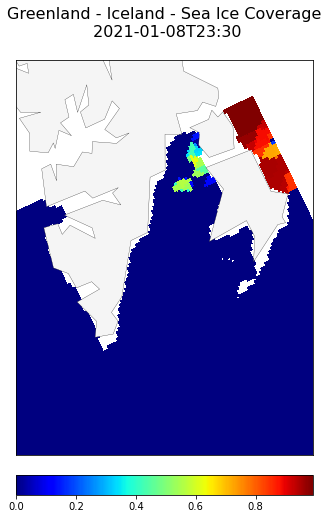

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T00:30.png


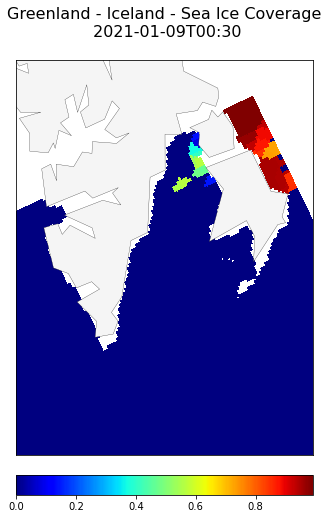

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T01:30.png


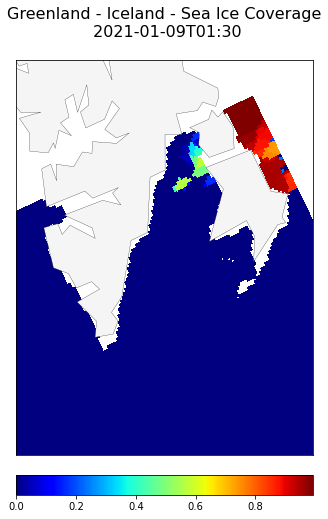

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T02:30.png


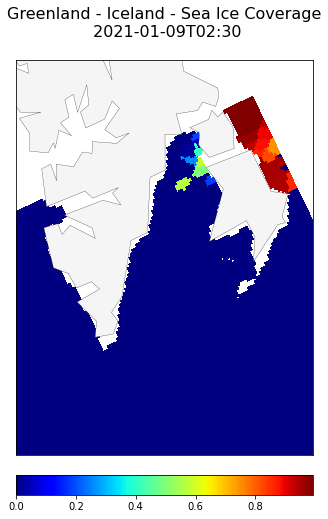

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T03:30.png


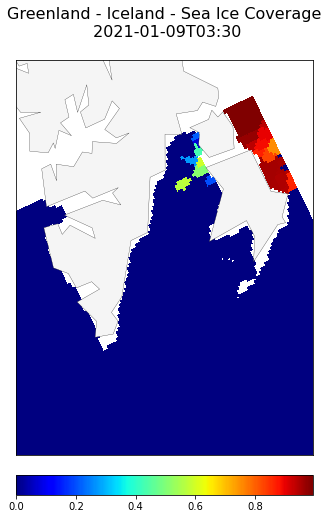

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T04:30.png


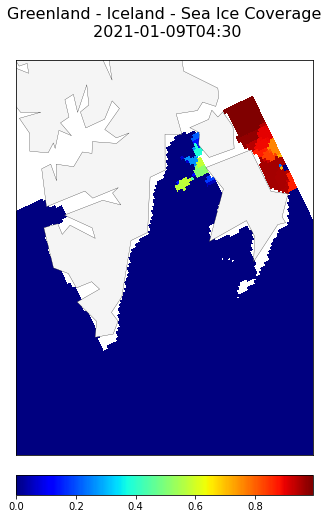

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T05:30.png


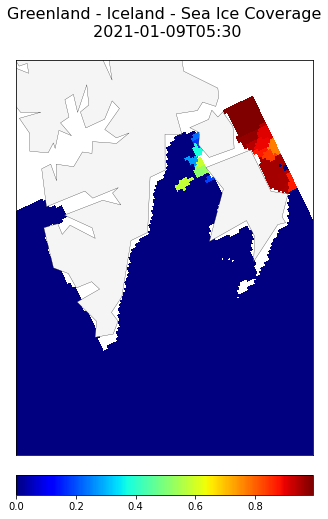

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T06:30.png


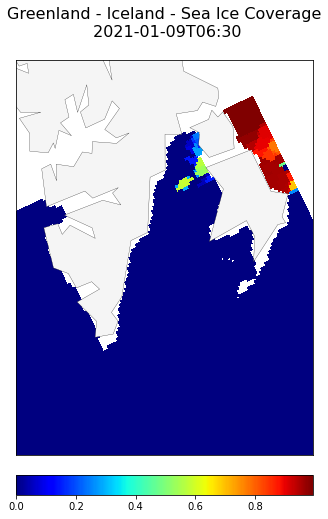

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T07:30.png


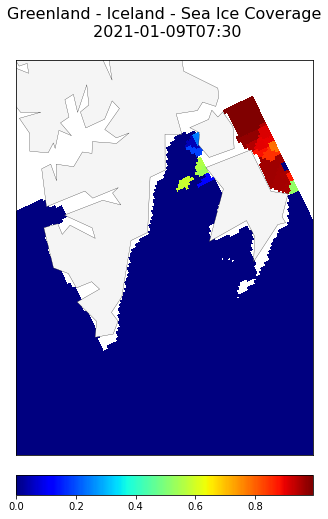

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T08:30.png


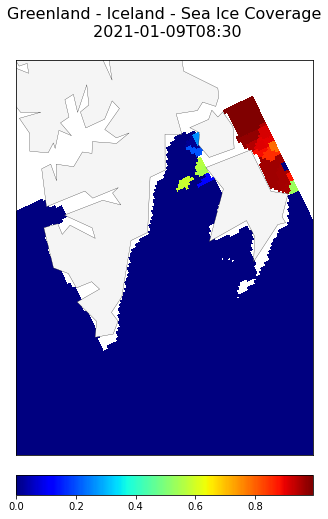

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T09:30.png


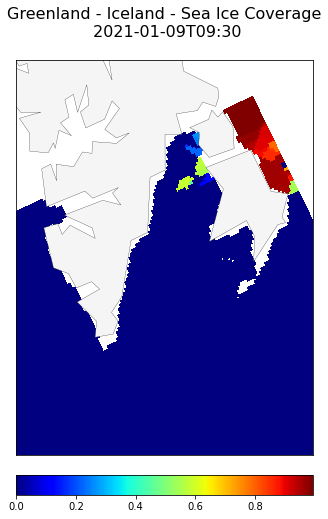

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T10:30.png


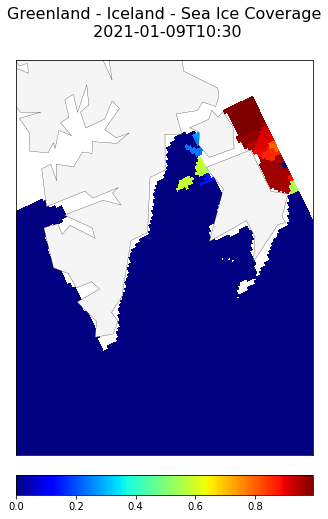

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T11:30.png


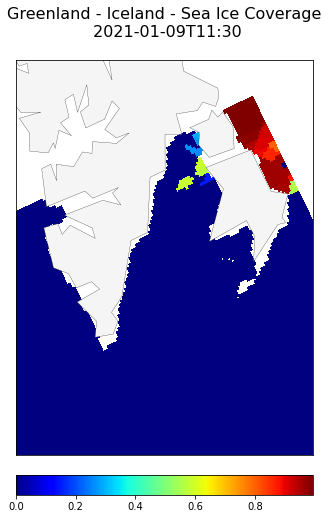

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T12:30.png


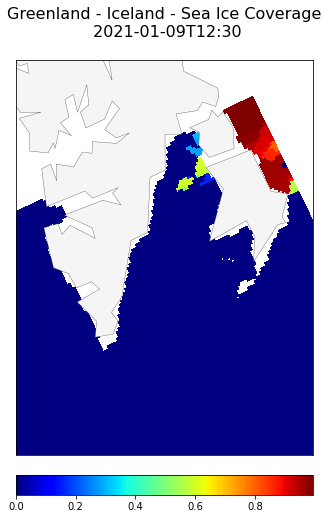

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T13:30.png


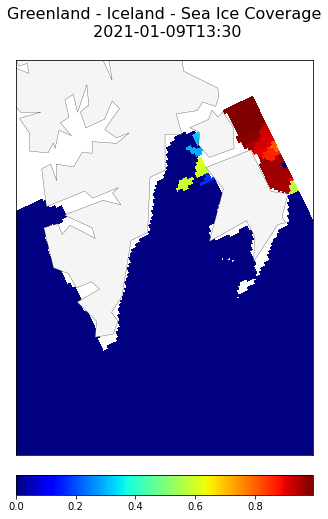

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T14:30.png


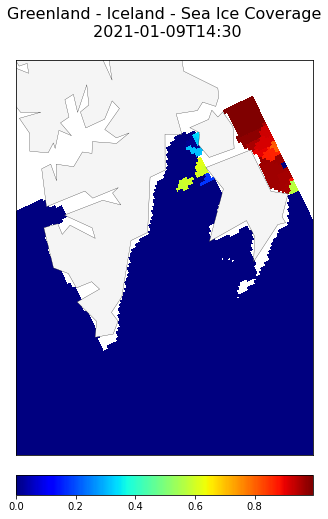

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T15:30.png


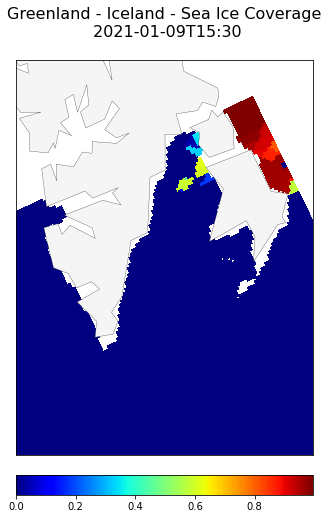

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T16:30.png


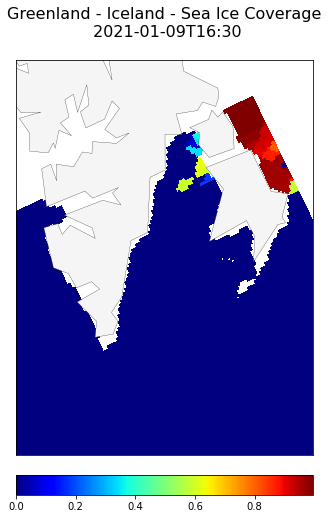

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T17:30.png


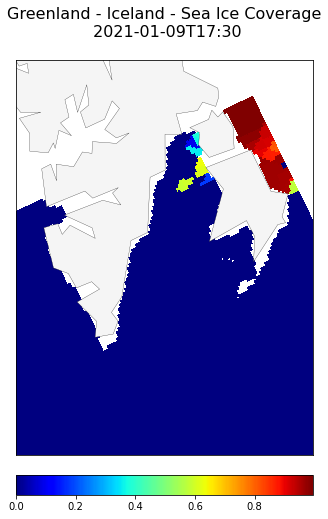

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T18:30.png


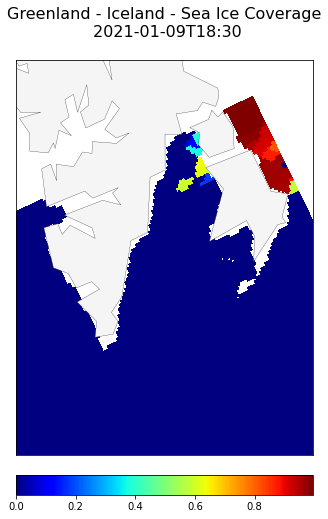

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T19:30.png


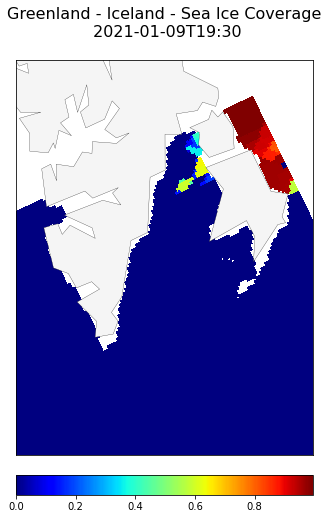

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T20:30.png


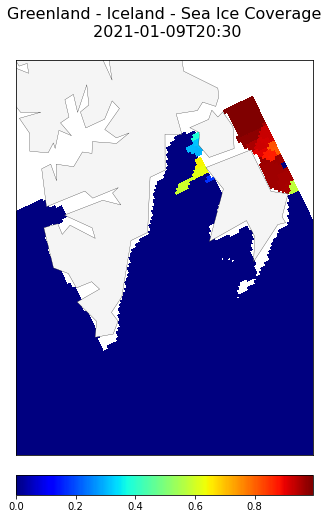

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T21:30.png


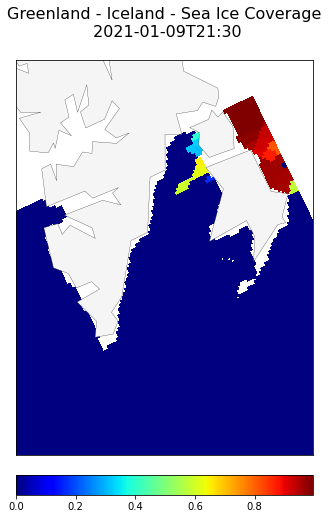

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T22:30.png


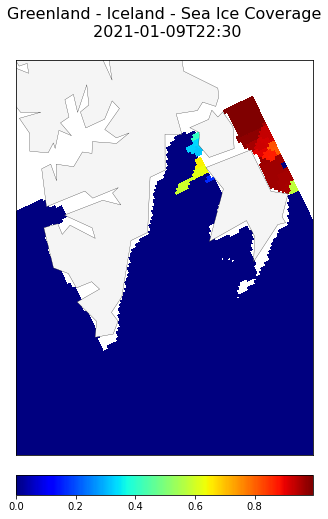

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-09T23:30.png


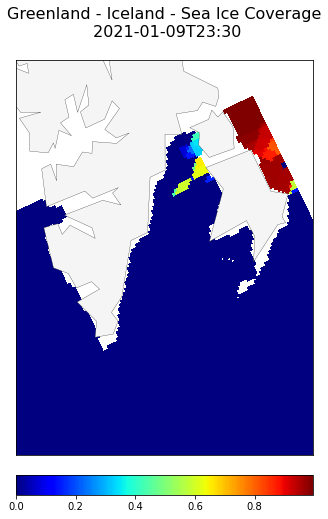

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T00:30.png


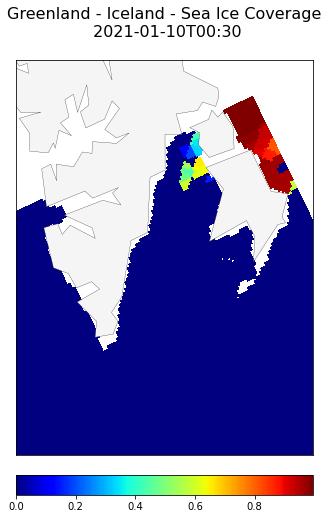

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T01:30.png


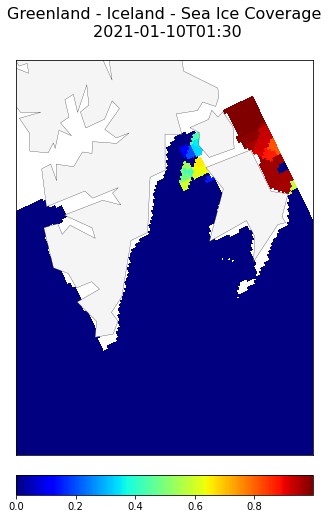

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T02:30.png


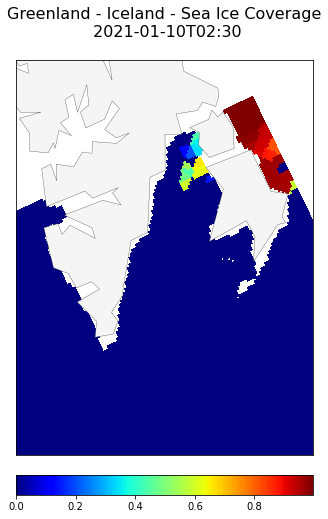

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T03:30.png


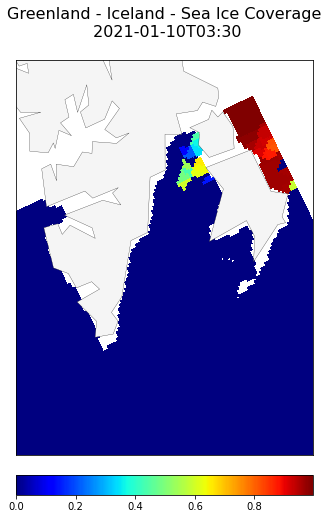

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T04:30.png


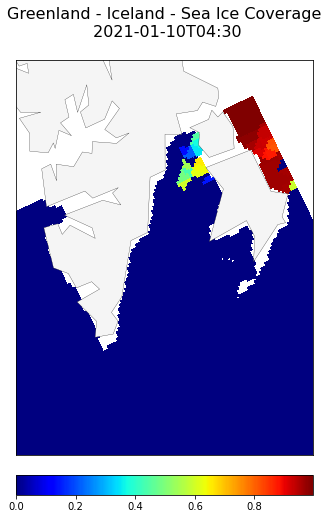

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T05:30.png


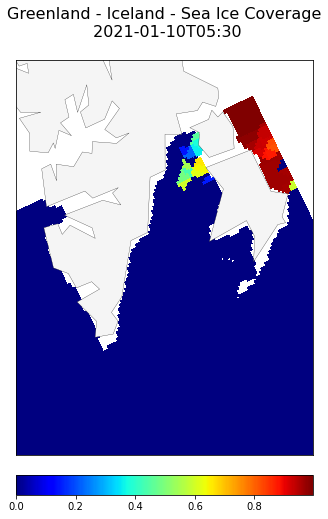

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T06:30.png


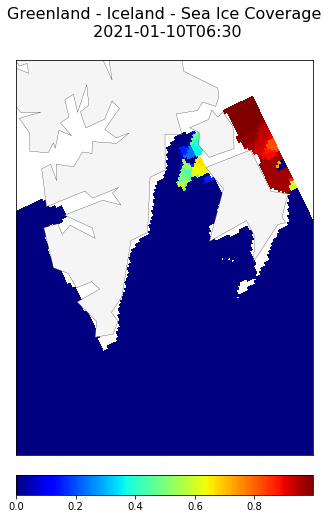

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T07:30.png


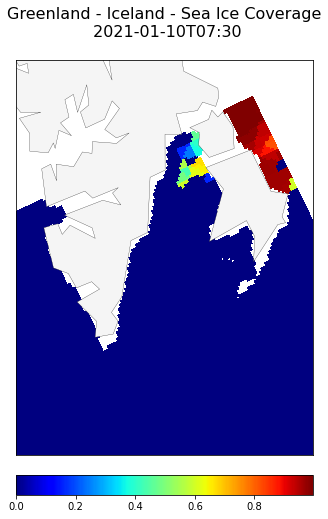

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T08:30.png


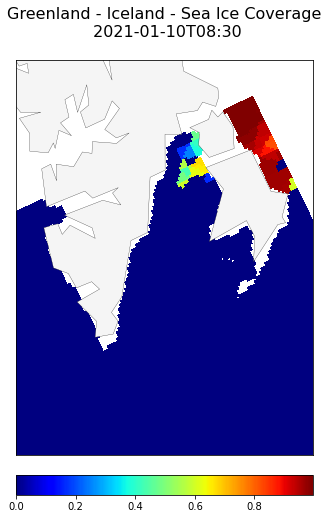

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T09:30.png


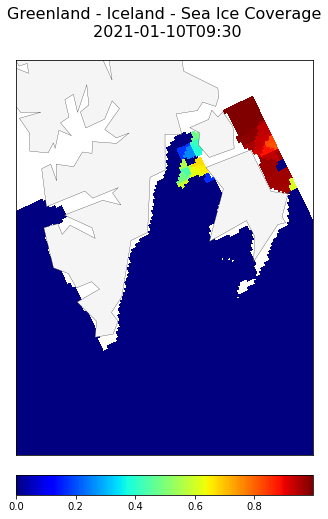

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T10:30.png


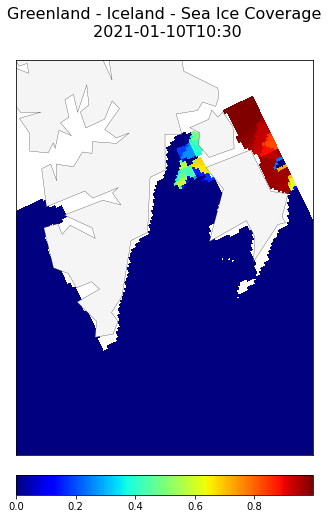

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T11:30.png


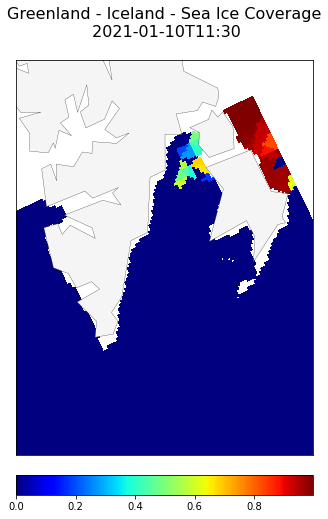

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T12:30.png


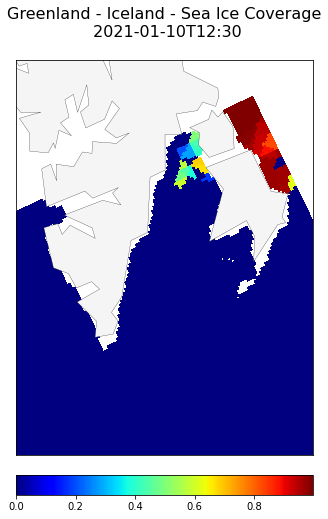

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T13:30.png


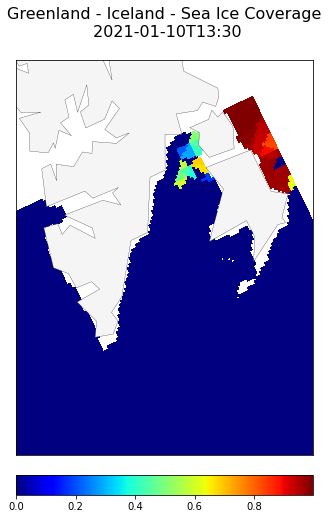

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T14:30.png


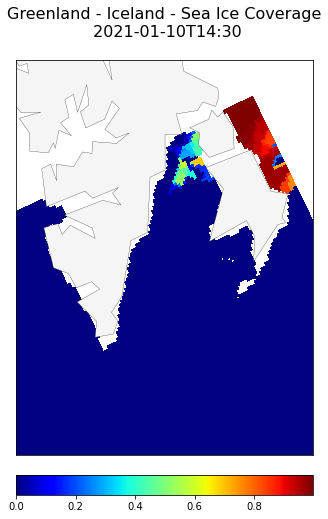

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T15:30.png


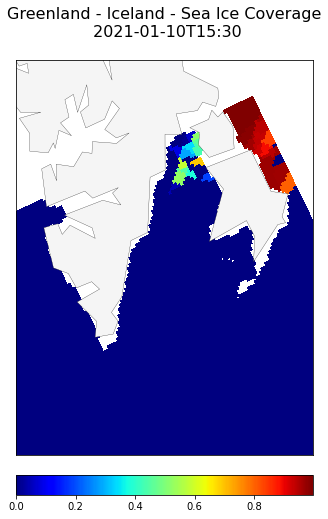

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T16:30.png


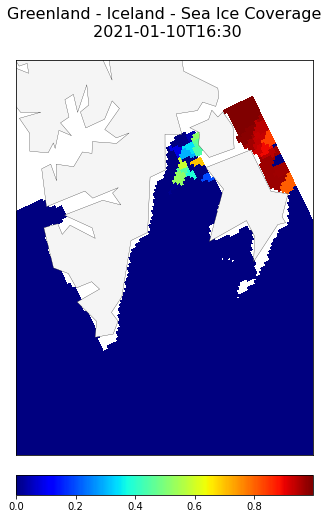

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T17:30.png


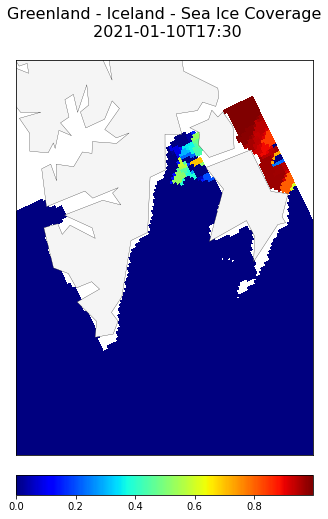

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T18:30.png


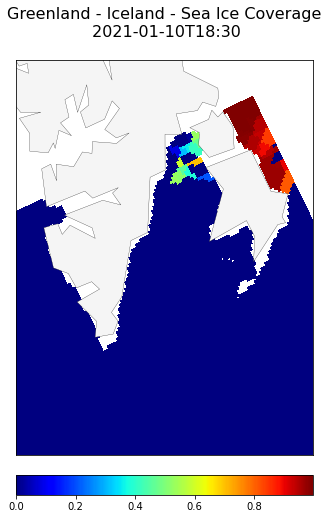

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T19:30.png


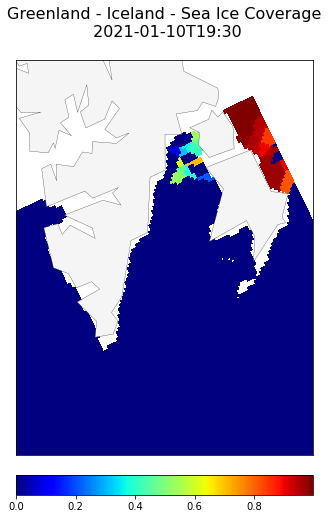

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T20:30.png


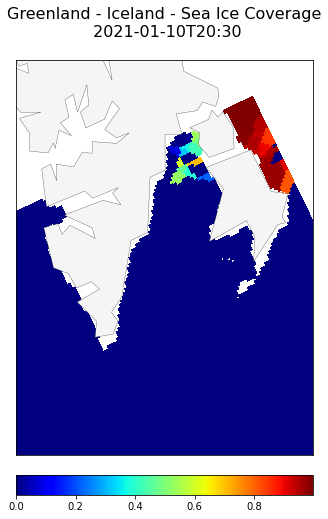

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T21:30.png


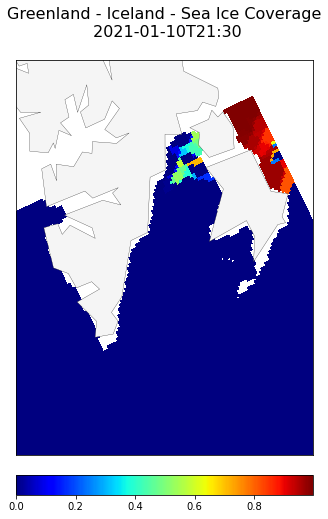

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T22:30.png


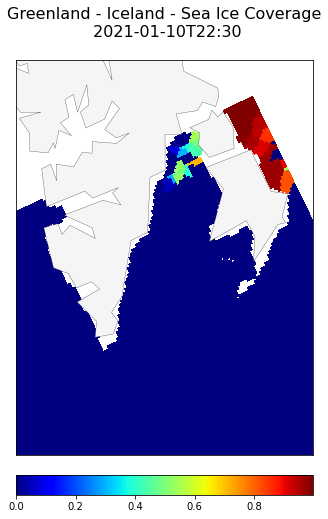

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-10T23:30.png


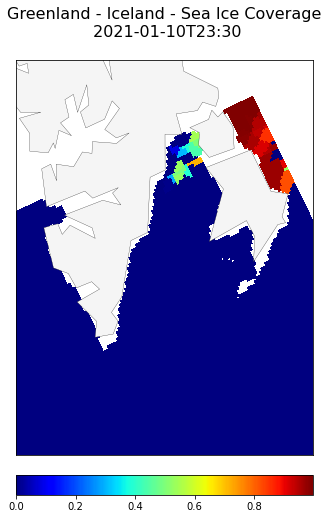

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-11T00:30.png


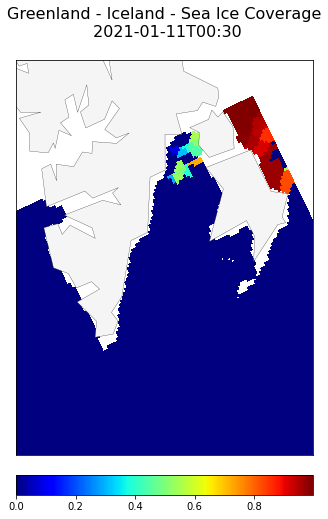

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-11T01:30.png


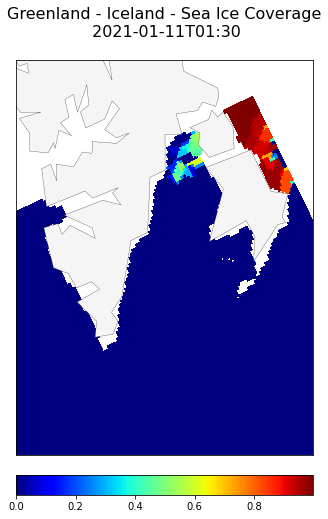

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-11T02:30.png


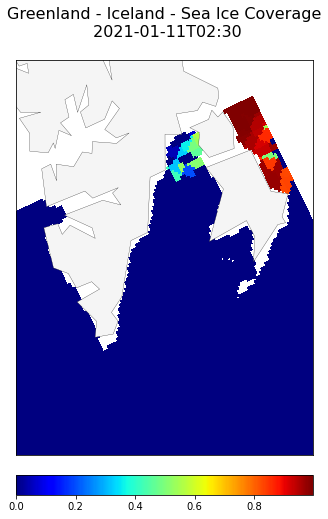

Save file: /drive/MyDrive/hackathon/out_sweeden_h/plot_sea_ice_coverage_DMI_2021-01-11T03:30.png


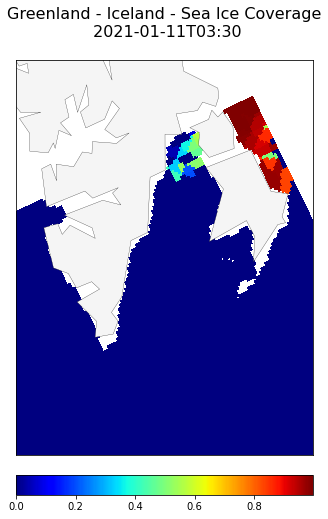

In [ ]:
for date_time in VarTime:

  Var_date1=Var.sel(time=date_time, method='nearest')
  date1=Var_date1.time.values.astype('datetime64[m]')

  fig,(axe1) = plt.subplots(1,1, figsize=(16,8)) # 16 is width, 8 is height

  ### Plot the first date

  # create a Basemap for Greenland Iceland area
  # m = Basemap(projection='cass',  ax=axe1, lat_0=71.45, lon_0=-18, resolution='h', width=500000, height =350000)

  # create a Basemap for Sweeden area 
  m = Basemap(projection='cass',  ax=axe1, lat_0=77.3, lon_0=19, resolution='l', width=300000, height =400000)

  # Draw coastlines, country boundaries, fill continents.
  m.drawcoastlines(linewidth=0.25)
  m.drawcountries(linewidth=0.25, color='olive')
  m.fillcontinents(color='whitesmoke')

  # Draw parallels & meridians
  m.drawmeridians(np.arange(30,360,60),labels=[1,1,1,1])
  m.drawparallels(np.arange(60,90,5),labels=[1,1,1,1])

  # plot the first date
  im1 = m.pcolormesh(Lon.values,Lat.values,Var_date1,shading='flat',cmap=plt.cm.jet,latlon=True)
  # im1.set_clim(vmin=Minvalue, vmax=Maxvalue)

  # add colorbar
  cb = m.colorbar(im1,"bottom", size="5%", pad="5%")

  # add a title.
  plt.title( 'Greenland - Iceland - Sea Ice Coverage' '\n'   ' {}' '\n'.format(date1),fontsize=16)

  #Save file
  FOutName = '/drive/MyDrive/hackathon/{}/plot_sea_ice_coverage_DMI_{}.png'.format(output_folder, date1)
  print('Save file:', FOutName)
  plt.savefig(FOutName)

  plt.show()

<div class="alert alert-block alert-info">
We just generated maps of the sea ice coverage from the DMI product from 2021-11-01 00:30 to 2021-11-12 23:30.

## Generate video


In [ ]:
import cv2
import os

image_folder = path + output_folder
video_name = 'video.avi'
print(image_folder)
images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 16, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()